d
 # Group 1 Project - Identifying Fake Yelp Restaurant Reviews

Business Analytics Capstone (BA 5651) - Spring 2021

Group Members:- Neil D Souza, Ajin Thomas, Debanjana Dey, Yash Gaur

#Business Problem

The success or failure of a business can highly depend on its online reviews. From choosing the best hotels in town to finding the best restaurants, most people these days tend to rely on online reviews. Reviews are quickly replacing friend recommendations to become the main way we vet businesses against one another. We tend to rely on online reviews so much that a single bad review can completely ruin the online reputation of a company.
Yelp is one of the largest online reviews’ platform for restaurants and other businesses, where customer reviews are utilized to make the necessary changes to their products and services. Our project is based on yelp restaurant reviews. The business problem is that a lot of fake restaurant reviews exist, and these reviews affect the business’s overall ratings, and diminishes their ability to achieve the goals these restaurants have in mind, as customer perceptions of their products and services diminish. Without being able to identify which of its restaurant reviews are fake or suspicious, Yelp will not be able to make the necessary changes to maximize platform brand loyalty, satisfaction, and profits. So, It is crucial for Yelp to be able to identify such fake or suspicious reviews immediately, and take corrective action, in order for it as a platform to stay relevant. 

This Business Problem is a very relevant problem, and is not just one that Yelp is facing, but is also common to almost all other online review platforms. Our end goal is to create models that can not only help address this issue at Yelp, but that can be utilized across other similar platforms, and companies.

# Overview of the Analysis Conducted

The following are some of the main technical aspects of our project.

•	Initially, we start with performing an EDA on the data, to identify some key characteristics of the data for further analysis.

•	Through Feature Engineering we added new/additional features to our dataset that enabled us to develop a more accurate and robust analytical model to differentiate Fake and True reviews.

•	TFIDF. TF-IDF stands for Term Frequency — Inverse Document Frequency and is a statistic that aims to better define how important a word is. We analyzed the customer reviews to find whether they are positive, negative, or neutral for the respective Yelp restaurants as per the dataset. 


•	Dimensional Reduction. We made a correlation matrix and removed variables that were highly correlated. 

•	Model Building. This was the final step in our analysis

•   Adjusting for Imbalanced Data - Modified Algorithm Approach

•   Model Selection

# Exploratory Data Analysis (EDA)

In [0]:
# As mentioned above, EDA is the first step of our analysis. Here, we are importing all the necessary libraries and packages needed for our analysis:-

import os
import numpy as np 
import pandas as pd

In [0]:
# Creating a Spark DataFrame:-

spark_df = spark.read.format("csv").load("dbfs:/FileStore/shared_uploads/tul56215@temple.edu/Restaurant_data.csv")

In [0]:
# Converting the Spark DataFrame to a Pandas DataFrame:-

pandas_df = spark_df.toPandas()

In [0]:
# Screenshot of the first few rows of the DataFrame:-

pandas_df.head()

Out[4]:

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11,_c12,_c13,_c14,_c15,_c16,_c17,_c18,_c19,_c20,_c21,_c22,_c23,_c24
0,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,mnr,rl,rd,Maximum Content Similarity
1,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,unlike next we d eaten previous night dish com...,N,Scott E.,"Glengary, WV",01/10/2009,11,48,5,41,5,5,2,0,1,4.5,0.08333333333333333,497,0.125,0.12365348654586816
2,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,probably one best meals i ve ever it s perform...,N,Jerry K.,"Palos Verdes Peninsula, CA",01/06/2011,0,4,0,0,0,0,0,0,0,4.5,0.08333333333333333,41,0.125,0.0
3,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,9/19/2012,3,2,service impeccable experience presentation coo...,N,Patricia M.,"Chicago, IL",01/09/2008,2,11,0,6,0,1,0,0,0,4.5,0.08333333333333333,27,0.375,0.0
4,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,9/6/2012,3,8,the problem places like this given exhorbitant...,N,Terry N.,"San Jose, CA",01/10/2007,84,60,1,35,8,6,6,11,0,4.5,0.08333333333333333,244,0.375,0.0


In [0]:
# Screenshot of the last few rows of the DataFrame:-

pandas_df.tail()

Out[5]:

,_c0,_c1,_c2,_c3,_c4,_c5,_c6,_c7,_c8,_c9,_c10,_c11,_c12,_c13,_c14,_c15,_c16,_c17,_c18,_c19,_c20,_c21,_c22,_c23,_c24
26954,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,v9qEDxi3t-P0CmGWAkkGvw,3/17/2010,4,0,it s taco bell higher prices taco bell what st...,N,Kristen F.,"Chicago, IL",01/04/2006,31,165,33,201,56,17,24,0,3,4.0,0.08333333333333333,48,0.0,0.11113330626563778
26955,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,RRflazDtBkqqpvEz2hbV2w,4/14/2011,5,0,yellow rose favorite mine i d go every day i c...,N,Yvonne F.,IL,01/01/2007,6,11,2,7,2,0,1,0,1,4.0,0.08333333333333333,63,0.25,0.1397054389398733
26956,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,zI0E_yruu58ea-xq9aHi-w,9/23/2007,3,0,not bad we ate odd wicker seats inviting we at...,N,Saverio T.,"Chicago, IL",01/09/2007,13,49,7,58,9,10,7,1,1,4.0,0.08333333333333333,27,0.25,0.050463478702347575
26957,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,6XVXM78gBuU3gpq2hTOgJA,11/18/2011,3,0,we surprised eagerly roped pop trivia game upo...,N,Saverio T.,"Chicago, IL",01/09/2007,13,49,7,58,9,10,7,1,1,4.0,0.08333333333333333,42,0.25,0.050463478702347575
26958,x8knvE6V8MkwT90wCV0f,OZTkqoi8_luhrL-mMj7O8A,Lr4tZOsttQT-BgFtUkUTaQ,5/18/2012,4,0,a gorgeous shy young teen asked owner could si...,N,J. C. R.,"Chicago, IL",01/08/2011,13,14,1,5,2,4,6,14,0,4.5,0.08333333333333333,20,0.125,0.0


In [0]:
# Dropping the index column:-

df = pandas_df.rename(columns=pandas_df.iloc[0]).drop(pandas_df.index[0])
print(df)

reviewID ... Maximum Content Similarity
1 GtwU21YOQn-wf4vWRUIx6w ... 0.12365348654586816
2 0LpVTc3 ... 0.0
3 tljtLzf68Fkwf ... 0.0
4 iSN ... 0.0
5 Jmwrh7 ... 0.7608659715423002
... ... ... ...
26954 PZu8sDx2T2 ... 0.11113330626563778
26955 S-zbPPGoB ... 0.1397054389398733
26956 roKqXYooTy49OMAIJJjf ... 0.050463478702347575
26957 FefmFaWa ... 0.050463478702347575
26958 x8knvE6V8MkwT90wCV0f ... 0.0

[26958 rows x 25 columns]

In [0]:
# Importing all the necessary libraries and packages:-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# A look at the Feature Data Types:-

print(df.dtypes)

reviewID object
reviewerID object
restaurantID object
date object
rating object
reviewUsefulCount object
reviewContent object
flagged object
name object
location object
yelpJoinDate object
friendCount object
reviewCount object
firstCount object
usefulCount object
coolCount object
funnyCount object
complimentCount object
tipCount object
fanCount object
restaurantRating object
mnr object
rl object
rd object
Maximum Content Similarity object
dtype: object

In [0]:
# Converting the data types to the appropriate form:-

df["reviewCount"] = pd.to_numeric(df["reviewCount"])
df["rating"] = pd.to_numeric(df["rating"])
df["restaurantRating"] = pd.to_numeric(df["restaurantRating"])
df["reviewUsefulCount"] = pd.to_numeric(df["reviewUsefulCount"])
df["friendCount"] = pd.to_numeric(df["friendCount"])
df["firstCount"] = pd.to_numeric(df["firstCount"])
df["usefulCount"] = pd.to_numeric(df["usefulCount"])
df["coolCount"] = pd.to_numeric(df["coolCount"])
df["funnyCount"] = pd.to_numeric(df["funnyCount"])
df["complimentCount"] = pd.to_numeric(df["complimentCount"])
df["tipCount"] = pd.to_numeric(df["tipCount"])
df["fanCount"] = pd.to_numeric(df["fanCount"])
df["mnr"] = pd.to_numeric(df["mnr"])
df["rl"] = pd.to_numeric(df["rl"])
df["rd"] = pd.to_numeric(df["rd"])
df["Maximum Content Similarity"] = pd.to_numeric(df["Maximum Content Similarity"])
df['date'] = pd.to_datetime(df['date'])
df['yelpJoinDate'] = pd.to_datetime(df['yelpJoinDate'])

In [0]:
# Checking the revised Data Types after conversion:-

print(df.dtypes)

reviewID object
reviewerID object
restaurantID object
date datetime64[ns]
rating int64
reviewUsefulCount int64
reviewContent object
flagged object
name object
location object
yelpJoinDate datetime64[ns]
friendCount int64
reviewCount int64
firstCount int64
usefulCount int64
coolCount int64
funnyCount int64
complimentCount int64
tipCount int64
fanCount int64
restaurantRating float64
mnr float64
rl int64
rd float64
Maximum Content Similarity float64
dtype: object

#Data Visualisation 1

In [0]:
# Importing all the necessary libraries and packages:-

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)
import seaborn as sns

In [0]:
# A look at the count/distribution of not-fake (0) and  fake (1) reviews in the dataset:-

df["flagged"].value_counts()

Out[12]: N 20752
Y 6206
Name: flagged, dtype: int64

Out[13]:

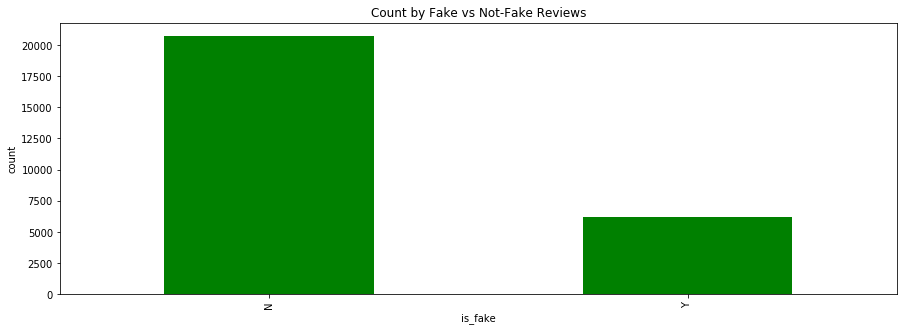

Text(0, 0.5, 'count')

In [0]:
# A visual look at the count/distribution of not-fake (0) and  fake (1) reviews in the dataset:-

df["flagged"].value_counts().plot(kind='bar', color = 'green')
plt.title("Count by Fake vs Not-Fake Reviews")
plt.xlabel("is_fake")
plt.ylabel("count")

In [0]:
# A look at the count/distribution of review "ratings" in the dataset:-

df["rating"].value_counts()

Out[14]: 5 10454
4 9480
3 3438
2 2022
1 1564
Name: rating, dtype: int64

Out[15]:

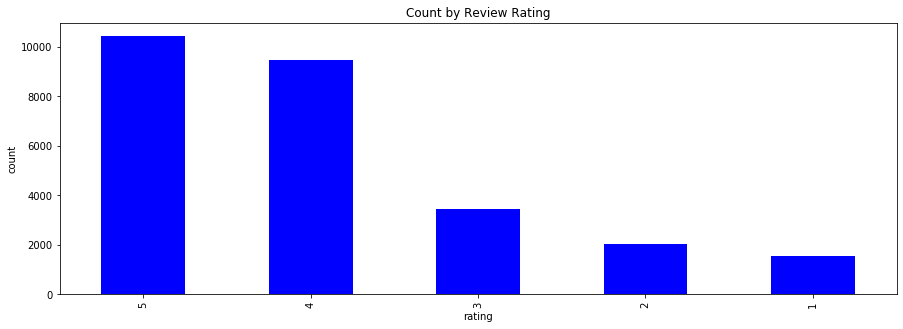

Text(0, 0.5, 'count')

In [0]:
# A visual look at the count/distribution of review "ratings" in the dataset:-

df["rating"].value_counts().plot(kind='bar', color = 'blue')
plt.title("Count by Review Rating")
plt.xlabel("rating")
plt.ylabel("count")

In [0]:
# A look at the count/distribution of the top 10 "restaurantID's" in the dataset:-

df["restaurantID"].value_counts()[:10]

Out[16]: OKOfoisduqP24uK3WYvx7Q 656
LMaoM2Ue2BR_HI9ba3JsZg 627
8d_DiHWB-pjBVW3a7D8EWg 603
pbEiXam9YJL3neCYHGwLUA 583
4wreIFjaPMppyEnzKHbozg 578
CwPi6NVuJIZZx4IBcTekFQ 545
boE4Ahsssqic7o5wQLI04w 522
sR4EOfPuI-at41uIxIZPhw 499
IvdOI86_CSCRFpid2atnyA 491
_UJ3KqtHIHjExbAg-iIGUA 490
Name: restaurantID, dtype: int64

Out[17]:

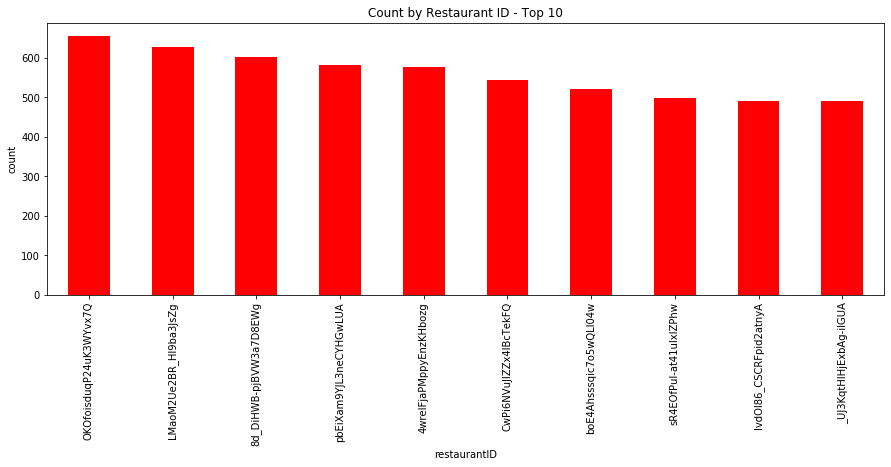

Text(0, 0.5, 'count')

In [0]:
# A visual look at the count/distribution of the top 10 "restaurantID's" in the dataset:-

df["restaurantID"].value_counts()[:10].plot(kind='bar', color = 'red')
plt.title("Count by Restaurant ID - Top 10")
plt.xlabel("restaurantID")
plt.ylabel("count")

d
 # Feature Engineering

The following are the features that we incorporated in our dataset: 

•	Length of review in Characters:  The idea is that Shorter reviews have a higher probability to be fake due to the reviewer being unable to mention details about their experience.

•	Length of review in Words:  The idea is that Shorter reviews have a higher probability to be fake due to the reviewer being unable to mention details about their experience. Utilizing this 
    information helped us achieve a model that is more effective in rooting out fake reviews. This feature is similar to length of reviews in Characters.

•	Date (Join Date – Review Date): In the dataset we have two columns that show ‘Join date’ and ‘Review Date’. We used this to determine the duration between a user’s account creation date and the 
    date the review was posted. A new account posting highly negative or positive reviews shortly after creating an account is a possible red flag and identifying these reviews is vital.

•	One hot encoding for Gender: Feature engineering for a gender variable using one hot Encoding to create dummy variables. 

•	Positive and Negative words in a Review:  Too many positive or negative words could suggest a possible fake review which is why we felt this was an important feature to include.

•	Average word length of each Review: Similar to length of words, a review with a shorter average word length is more likely to be fake which is why we also took this into consideration.

1) Number of Characters (Without Spaces) in the Review Content

In [0]:
# Removing all the spaces in the "Review Content":-

NoSpacesinContent = df['reviewContent'].str.replace(" ", "")

In [0]:
# A quick look at the review content without the spaces:-

NoSpacesinContent

Out[19]: 1 unlikenextwedeatenpreviousnightdishcompletelyr...
2 probablyonebestmealsiveeveritsperformancefoodb...
3 serviceimpeccableexperiencepresentationcooleat...
4 theproblemplaceslikethisgivenexhorbitantcostme...
5 iideawritereviewdiningalineabringswholediffere...
 ... 
26954 itstacobellhigherpricestacobellwhatstandsemplo...
26955 yellowrosefavoritemineidgoeverydayicouldsadica...
26956 notbadweateoddwickerseatsinvitingweatesomethin...
26957 wesurprisedeagerlyropedpoptriviagameuponwalkin...
26958 agorgeousshyyoungteenaskedownercouldsittableow...
Name: reviewContent, Length: 26958, dtype: object

In [0]:
# Calculating and Adding "ReviewLengthCharacters" as a feature/column in the DataFrame:-

df['ReviewLengthCharacters'] = NoSpacesinContent.str.len()

In [0]:
# Snapshot of the first few rows in the DataFrame:-

df.head()

Out[21]:

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,mnr,rl,rd,Maximum Content Similarity,ReviewLengthCharacters
1,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,2012-09-22,5,0,unlike next we d eaten previous night dish com...,N,Scott E.,"Glengary, WV",2009-01-10,11,48,5,41,5,5,2,0,1,4.5,0.083333,497,0.125,0.123653,2730.0
2,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,2012-09-22,5,0,probably one best meals i ve ever it s perform...,N,Jerry K.,"Palos Verdes Peninsula, CA",2011-01-06,0,4,0,0,0,0,0,0,0,4.5,0.083333,41,0.125,0.000000,211.0
3,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,2012-09-19,3,2,service impeccable experience presentation coo...,N,Patricia M.,"Chicago, IL",2008-01-09,2,11,0,6,0,1,0,0,0,4.5,0.083333,27,0.375,0.000000,160.0
4,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,2012-09-06,3,8,the problem places like this given exhorbitant...,N,Terry N.,"San Jose, CA",2007-01-10,84,60,1,35,8,6,6,11,0,4.5,0.083333,244,0.375,0.000000,1350.0
5,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,2012-09-09,5,1,i idea write review dining alinea brings whole...,N,Shradha Vegetarianista A.,"Chicago, IL",2007-01-07,333,1209,61,1650,679,417,283,22,70,4.5,0.083333,97,0.125,0.760866,542.0


In [0]:
# Renaming the "mnr", "rl" and "rd" Columns:-

df.rename(columns = {'mnr' : 'MaximumNumberOfReviews-Day', 'rl' : 'ReviewNumberofWords', 'rd' : 'ReviewDeviation'}, inplace = True)

In [0]:
# Snapshot of the first few rows in the DataFrame:-

df.head()

Out[23]:

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,ReviewLengthCharacters
1,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,2012-09-22,5,0,unlike next we d eaten previous night dish com...,N,Scott E.,"Glengary, WV",2009-01-10,11,48,5,41,5,5,2,0,1,4.5,0.083333,497,0.125,0.123653,2730.0
2,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,2012-09-22,5,0,probably one best meals i ve ever it s perform...,N,Jerry K.,"Palos Verdes Peninsula, CA",2011-01-06,0,4,0,0,0,0,0,0,0,4.5,0.083333,41,0.125,0.000000,211.0
3,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,2012-09-19,3,2,service impeccable experience presentation coo...,N,Patricia M.,"Chicago, IL",2008-01-09,2,11,0,6,0,1,0,0,0,4.5,0.083333,27,0.375,0.000000,160.0
4,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,2012-09-06,3,8,the problem places like this given exhorbitant...,N,Terry N.,"San Jose, CA",2007-01-10,84,60,1,35,8,6,6,11,0,4.5,0.083333,244,0.375,0.000000,1350.0
5,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,2012-09-09,5,1,i idea write review dining alinea brings whole...,N,Shradha Vegetarianista A.,"Chicago, IL",2007-01-07,333,1209,61,1650,679,417,283,22,70,4.5,0.083333,97,0.125,0.760866,542.0


2) Number of Days between the join date and the review post date

In [0]:
# Calculating and Adding "difference_in_datetime" as a feature/column in the DataFrame:-

df['difference_in_datetime'] = abs(df['date'] - df['yelpJoinDate'])
print(df['difference_in_datetime'])

1 1351 days
2 625 days
3 1715 days
4 2066 days
5 2072 days
 ... 
26954 1533 days
26955 1564 days
26956 257 days
26957 1774 days
26958 496 days
Name: difference_in_datetime, Length: 26958, dtype: timedelta64[ns]

In [0]:
# Snapshot of the first few rows in the DataFrame:-

df.head()

Out[25]:

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,ReviewLengthCharacters,difference_in_datetime
1,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,2012-09-22,5,0,unlike next we d eaten previous night dish com...,N,Scott E.,"Glengary, WV",2009-01-10,11,48,5,41,5,5,2,0,1,4.5,0.083333,497,0.125,0.123653,2730.0,1351 days
2,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,2012-09-22,5,0,probably one best meals i ve ever it s perform...,N,Jerry K.,"Palos Verdes Peninsula, CA",2011-01-06,0,4,0,0,0,0,0,0,0,4.5,0.083333,41,0.125,0.000000,211.0,625 days
3,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,2012-09-19,3,2,service impeccable experience presentation coo...,N,Patricia M.,"Chicago, IL",2008-01-09,2,11,0,6,0,1,0,0,0,4.5,0.083333,27,0.375,0.000000,160.0,1715 days
4,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,2012-09-06,3,8,the problem places like this given exhorbitant...,N,Terry N.,"San Jose, CA",2007-01-10,84,60,1,35,8,6,6,11,0,4.5,0.083333,244,0.375,0.000000,1350.0,2066 days
5,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,2012-09-09,5,1,i idea write review dining alinea brings whole...,N,Shradha Vegetarianista A.,"Chicago, IL",2007-01-07,333,1209,61,1650,679,417,283,22,70,4.5,0.083333,97,0.125,0.760866,542.0,2072 days


In [0]:
# A look at the columns in the DataFrame:-

df.columns

Out[26]: Index(['reviewID', 'reviewerID', 'restaurantID', 'date', 'rating',
 'reviewUsefulCount', 'reviewContent', 'flagged', 'name', 'location',
 'yelpJoinDate', 'friendCount', 'reviewCount', 'firstCount',
 'usefulCount', 'coolCount', 'funnyCount', 'complimentCount', 'tipCount',
 'fanCount', 'restaurantRating', 'MaximumNumberOfReviews-Day',
 'ReviewNumberofWords', 'ReviewDeviation', 'Maximum Content Similarity',
 'ReviewLengthCharacters', 'difference_in_datetime'],
 dtype='object')

3) Number of Gender Features that can be taken into account

In [0]:
# Imputing gender feature:-

df["gender"] = ""
print(df['gender'])

1 
2 
3 
4 
5 
 ..
26954 
26955 
26956 
26957 
26958 
Name: gender, Length: 26958, dtype: object

In [0]:
# Imputing male gender values:-

df['gender'] = df['gender'].replace(df['gender'], 'Male')
print(df)

reviewID ... gender
1 GtwU21YOQn-wf4vWRUIx6w ... Male
2 0LpVTc3 ... Male
3 tljtLzf68Fkwf ... Male
4 iSN ... Male
5 Jmwrh7 ... Male
... ... ... ...
26954 PZu8sDx2T2 ... Male
26955 S-zbPPGoB ... Male
26956 roKqXYooTy49OMAIJJjf ... Male
26957 FefmFaWa ... Male
26958 x8knvE6V8MkwT90wCV0f ... Male

[26958 rows x 28 columns]

In [0]:
# Screenshot of the top few rows of the DataFrame:-
  
df.head()

Out[29]:

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,ReviewLengthCharacters,difference_in_datetime,gender
1,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,2012-09-22,5,0,unlike next we d eaten previous night dish com...,N,Scott E.,"Glengary, WV",2009-01-10,11,48,5,41,5,5,2,0,1,4.5,0.083333,497,0.125,0.123653,2730.0,1351 days,Male
2,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,2012-09-22,5,0,probably one best meals i ve ever it s perform...,N,Jerry K.,"Palos Verdes Peninsula, CA",2011-01-06,0,4,0,0,0,0,0,0,0,4.5,0.083333,41,0.125,0.000000,211.0,625 days,Male
3,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,2012-09-19,3,2,service impeccable experience presentation coo...,N,Patricia M.,"Chicago, IL",2008-01-09,2,11,0,6,0,1,0,0,0,4.5,0.083333,27,0.375,0.000000,160.0,1715 days,Male
4,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,2012-09-06,3,8,the problem places like this given exhorbitant...,N,Terry N.,"San Jose, CA",2007-01-10,84,60,1,35,8,6,6,11,0,4.5,0.083333,244,0.375,0.000000,1350.0,2066 days,Male
5,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,2012-09-09,5,1,i idea write review dining alinea brings whole...,N,Shradha Vegetarianista A.,"Chicago, IL",2007-01-07,333,1209,61,1650,679,417,283,22,70,4.5,0.083333,97,0.125,0.760866,542.0,2072 days,Male


In [0]:
# Introducing female gender into into df:-

df.loc[1:15000,'gender'] = 'female'

df = df.sample(frac = 1) 
df

Out[30]:

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,ReviewLengthCharacters,difference_in_datetime,gender
17290,2NXKOR58b9Y8d5,pP3kk0jkCvHp2cTPOoNDIQ,euO3-H92LCivH2B0CQPlnw,2012-07-31,5,0,let first say i like bbq going q saturday nigh...,N,Angela C.,"Chicago, IL",2009-01-10,15,9,1,6,1,1,0,0,0,4.0,0.083333,122,0.250,0.000000,619.0,1298 days,Male
11992,Opk1SNp3TIFmjukwGFoRrg,9VJfIysdpS_QuPErmm5N8w,-pO0hsi0xlF4FwqLGJUizg,2010-04-28,4,0,stop impulsively instead heading thai food the...,N,Kevin G.,"Chicago, IL",2010-01-03,0,20,1,9,1,6,1,1,0,4.0,0.083333,33,0.000,0.032193,194.0,115 days,female
5697,rqe6Y4OZOa0mbT29ZAF5EQ,Uh0dcgrCj5veZYlfXD8deg,ALwH81_sqskLmwfWS-_eeQ,2011-07-10,4,0,i came first time yesterday post civil union l...,N,amanda t.,"Chicago, IL",2009-01-05,20,12,0,2,1,3,0,8,0,4.0,0.166667,176,0.000,0.132616,913.0,916 days,female
371,g2y3-XbTL6HdR,nYIH8IHzWp3j33L3qsAz5Q,pbEiXam9YJL3neCYHGwLUA,2010-03-12,5,3,have ever wonderland how oz i have form alinea...,N,Sheena M.,"Riverside, CA",2007-01-05,150,398,47,686,363,230,117,18,25,4.5,0.083333,564,0.125,0.145491,2899.0,1162 days,female
9748,CDALI-rIuRpyFxvIe9R2Eg,7gTwt0Zsq-jOpqYOkjiMHQ,sR4EOfPuI-at41uIxIZPhw,2011-08-23,1,4,this place ridiculous slow good beer selection...,N,Gabriela A.,"Chicago, IL",2009-01-11,3,13,0,8,2,2,0,0,0,4.0,0.166667,23,0.750,0.025462,113.0,954 days,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22786,ISlZkjUTsNHC07q8MJqxxQ,1WShnvs0CK56PJvIp0Cvlg,yBRaSkuYwFhYEoucDyD0lA,2012-05-20,3,0,food good service brought 3 star the schezwan ...,N,Rebecca N.,"Chicago, IL",2012-01-01,26,73,1,48,13,11,4,0,0,4.0,0.083333,37,0.250,0.224804,169.0,140 days,Male
23765,1b-96UZ8ZexNIXNuZAOMRA,UcPqBjPJnm0B55MQYGHcaQ,ElCbMJRjgu9LDj4MxOKXew,2011-07-06,3,0,tried going without reservation wait hour long...,N,Katrina L.,"Evanston, IL",2007-01-02,10,60,0,83,60,58,10,0,4,4.0,0.083333,116,0.250,0.202371,536.0,1646 days,Male
6828,fSKwROK0raZ9ljsxArDmqQ,Ib6cCJbvEeZf_dfsw7x2Qg,N7juvW8YoFIj7sEBzVF8GQ,2010-03-21,5,0,catering simply awesome my friends i birthday ...,Y,Terry K.,"Chicago, IL",2010-01-03,0,1,0,3,3,0,0,0,0,4.0,0.083333,129,0.250,0.000000,612.0,77 days,female
22504,MSrHnotUSR,GZI7BWm5zAhXcLxXZrM4Yg,IuFEm-19YYh49T5ZlvwkDA,2010-07-03,5,1,superb cuban sandwiches the three us lechon cu...,N,Toby B.,"Chicago, IL",2009-01-01,0,20,0,15,4,4,1,0,0,4.5,0.083333,36,0.125,0.045816,207.0,548 days,Male


In [0]:
# Perform one-hot encoding:-

df = pd.get_dummies(df, columns=['gender'])
df.head()

Out[31]:

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,ReviewLengthCharacters,difference_in_datetime,gender_Male,gender_female
17290,2NXKOR58b9Y8d5,pP3kk0jkCvHp2cTPOoNDIQ,euO3-H92LCivH2B0CQPlnw,2012-07-31,5,0,let first say i like bbq going q saturday nigh...,N,Angela C.,"Chicago, IL",2009-01-10,15,9,1,6,1,1,0,0,0,4.0,0.083333,122,0.250,0.000000,619.0,1298 days,1,0
11992,Opk1SNp3TIFmjukwGFoRrg,9VJfIysdpS_QuPErmm5N8w,-pO0hsi0xlF4FwqLGJUizg,2010-04-28,4,0,stop impulsively instead heading thai food the...,N,Kevin G.,"Chicago, IL",2010-01-03,0,20,1,9,1,6,1,1,0,4.0,0.083333,33,0.000,0.032193,194.0,115 days,0,1
5697,rqe6Y4OZOa0mbT29ZAF5EQ,Uh0dcgrCj5veZYlfXD8deg,ALwH81_sqskLmwfWS-_eeQ,2011-07-10,4,0,i came first time yesterday post civil union l...,N,amanda t.,"Chicago, IL",2009-01-05,20,12,0,2,1,3,0,8,0,4.0,0.166667,176,0.000,0.132616,913.0,916 days,0,1
371,g2y3-XbTL6HdR,nYIH8IHzWp3j33L3qsAz5Q,pbEiXam9YJL3neCYHGwLUA,2010-03-12,5,3,have ever wonderland how oz i have form alinea...,N,Sheena M.,"Riverside, CA",2007-01-05,150,398,47,686,363,230,117,18,25,4.5,0.083333,564,0.125,0.145491,2899.0,1162 days,0,1
9748,CDALI-rIuRpyFxvIe9R2Eg,7gTwt0Zsq-jOpqYOkjiMHQ,sR4EOfPuI-at41uIxIZPhw,2011-08-23,1,4,this place ridiculous slow good beer selection...,N,Gabriela A.,"Chicago, IL",2009-01-11,3,13,0,8,2,2,0,0,0,4.0,0.166667,23,0.750,0.025462,113.0,954 days,0,1


4) Positive and Negative words for each review

In [0]:
# Binary variable for positivity and negativity classifcation:- 

df = df[df['rating']!= 3]
df['Positively_Rated'] = np.where(df['rating']>3, 1, 0)
df.head(10)

Out[32]:

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,ReviewLengthCharacters,difference_in_datetime,gender_Male,gender_female,Positively_Rated
17290,2NXKOR58b9Y8d5,pP3kk0jkCvHp2cTPOoNDIQ,euO3-H92LCivH2B0CQPlnw,2012-07-31,5,0,let first say i like bbq going q saturday nigh...,N,Angela C.,"Chicago, IL",2009-01-10,15,9,1,6,1,1,0,0,0,4.0,0.083333,122,0.250,0.000000,619.0,1298 days,1,0,1
11992,Opk1SNp3TIFmjukwGFoRrg,9VJfIysdpS_QuPErmm5N8w,-pO0hsi0xlF4FwqLGJUizg,2010-04-28,4,0,stop impulsively instead heading thai food the...,N,Kevin G.,"Chicago, IL",2010-01-03,0,20,1,9,1,6,1,1,0,4.0,0.083333,33,0.000,0.032193,194.0,115 days,0,1,1
5697,rqe6Y4OZOa0mbT29ZAF5EQ,Uh0dcgrCj5veZYlfXD8deg,ALwH81_sqskLmwfWS-_eeQ,2011-07-10,4,0,i came first time yesterday post civil union l...,N,amanda t.,"Chicago, IL",2009-01-05,20,12,0,2,1,3,0,8,0,4.0,0.166667,176,0.000,0.132616,913.0,916 days,0,1,1
371,g2y3-XbTL6HdR,nYIH8IHzWp3j33L3qsAz5Q,pbEiXam9YJL3neCYHGwLUA,2010-03-12,5,3,have ever wonderland how oz i have form alinea...,N,Sheena M.,"Riverside, CA",2007-01-05,150,398,47,686,363,230,117,18,25,4.5,0.083333,564,0.125,0.145491,2899.0,1162 days,0,1,1
9748,CDALI-rIuRpyFxvIe9R2Eg,7gTwt0Zsq-jOpqYOkjiMHQ,sR4EOfPuI-at41uIxIZPhw,2011-08-23,1,4,this place ridiculous slow good beer selection...,N,Gabriela A.,"Chicago, IL",2009-01-11,3,13,0,8,2,2,0,0,0,4.0,0.166667,23,0.750,0.025462,113.0,954 days,0,1,0
14994,UbT9NuxziBkYztjk-dIyEg,WZMmPzJ3kYnerwDFu3bggQ,OKOfoisduqP24uK3WYvx7Q,2011-01-12,5,0,great beer great food great service my fiance ...,N,Nicole B.,"Chicago, IL",2010-01-05,3,9,0,12,2,1,0,0,0,4.0,0.083333,71,0.250,0.000000,345.0,372 days,0,1,1
3819,zBsWsM9mmv2yzoTKPQc8jA,nFmMvedJQ0uYS5KGHCMJGg,oEFJ29zAQaCNnQzebHQvpg,2010-03-28,5,0,most reviews go great detail place already i l...,N,Adrian AJ J.,"Chicago, IL",2009-01-01,13,69,0,92,18,17,7,0,1,4.0,0.083333,128,0.250,0.103333,616.0,451 days,0,1,1
4692,NKOFsaRPhIlNpQf8z6SStQ,jH-RRw5ezxGHUU0jp0jKcg,xXSMc3pDWTRQHLgjBTtTUg,2010-05-08,4,0,great service great food,N,Flo J.,"Chicago, IL",2010-01-05,5,53,0,23,7,7,0,0,2,4.0,0.333333,4,0.000,0.208614,21.0,123 days,0,1,1
20354,P0yXD-IWjDGytV1Nd6ZcQQ,UyQzJZCLciXJwljFb8L2aw,WaIbupMGDBi5B3SChsUH8A,2009-08-23,2,3,this place great reviews i must ve really gott...,N,Olga S.,"Chicago, IL",2006-01-12,18,32,3,68,26,9,9,0,4,4.0,0.083333,154,0.500,0.091316,699.0,1319 days,1,0,0
7163,hCbLDFbG5Aoy5QQjDzEMuA,U1u3Ym_wClJix2nmSMPoDg,o54U2VkQama8FI30qDkWvw,2010-10-05,5,5,for me trip lakeview complete without stopping...,N,James Schiebefehl T.,"Chicago, IL",2010-01-02,18,31,2,110,74,124,91,0,0,4.0,0.083333,162,0.250,0.139523,806.0,276 days,0,1,1


In [0]:
# To find positive and negative words for each review:-

pd.crosstab(index = df['Positively_Rated'], columns="Total count")

Out[33]:

col_0,Total count
Positively_Rated,
0,3586
1,19934


In [0]:
# Screenshot of the first few rows in the DataFrame:-

df.head()

Out[34]:

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,ReviewLengthCharacters,difference_in_datetime,gender_Male,gender_female,Positively_Rated
17290,2NXKOR58b9Y8d5,pP3kk0jkCvHp2cTPOoNDIQ,euO3-H92LCivH2B0CQPlnw,2012-07-31,5,0,let first say i like bbq going q saturday nigh...,N,Angela C.,"Chicago, IL",2009-01-10,15,9,1,6,1,1,0,0,0,4.0,0.083333,122,0.250,0.000000,619.0,1298 days,1,0,1
11992,Opk1SNp3TIFmjukwGFoRrg,9VJfIysdpS_QuPErmm5N8w,-pO0hsi0xlF4FwqLGJUizg,2010-04-28,4,0,stop impulsively instead heading thai food the...,N,Kevin G.,"Chicago, IL",2010-01-03,0,20,1,9,1,6,1,1,0,4.0,0.083333,33,0.000,0.032193,194.0,115 days,0,1,1
5697,rqe6Y4OZOa0mbT29ZAF5EQ,Uh0dcgrCj5veZYlfXD8deg,ALwH81_sqskLmwfWS-_eeQ,2011-07-10,4,0,i came first time yesterday post civil union l...,N,amanda t.,"Chicago, IL",2009-01-05,20,12,0,2,1,3,0,8,0,4.0,0.166667,176,0.000,0.132616,913.0,916 days,0,1,1
371,g2y3-XbTL6HdR,nYIH8IHzWp3j33L3qsAz5Q,pbEiXam9YJL3neCYHGwLUA,2010-03-12,5,3,have ever wonderland how oz i have form alinea...,N,Sheena M.,"Riverside, CA",2007-01-05,150,398,47,686,363,230,117,18,25,4.5,0.083333,564,0.125,0.145491,2899.0,1162 days,0,1,1
9748,CDALI-rIuRpyFxvIe9R2Eg,7gTwt0Zsq-jOpqYOkjiMHQ,sR4EOfPuI-at41uIxIZPhw,2011-08-23,1,4,this place ridiculous slow good beer selection...,N,Gabriela A.,"Chicago, IL",2009-01-11,3,13,0,8,2,2,0,0,0,4.0,0.166667,23,0.750,0.025462,113.0,954 days,0,1,0


#Data Visualisation 2

In [0]:
# A look at the count/distribution of "Maximum Number of Reviews in a Day" in the dataset:-

df["MaximumNumberOfReviews-Day"].value_counts()

Out[35]: 0.083333 20485
0.166667 2335
0.250000 488
0.333333 124
0.416667 35
0.500000 24
0.666667 12
0.833333 10
1.000000 7
Name: MaximumNumberOfReviews-Day, dtype: int64

Out[36]:

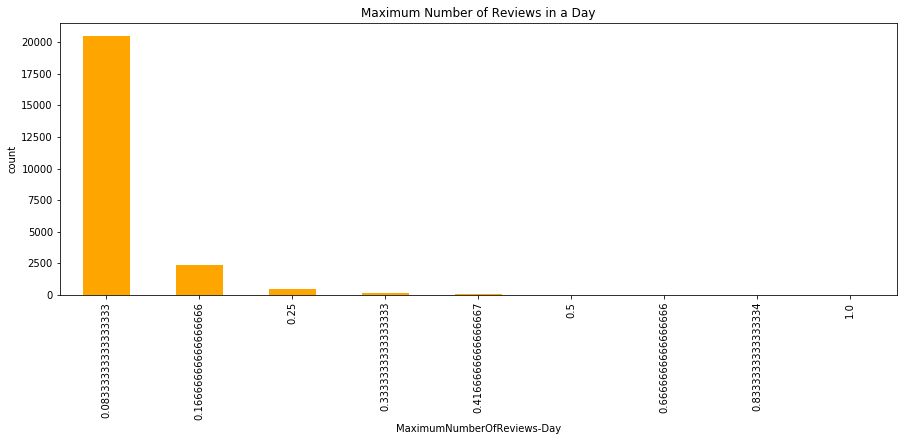

Text(0, 0.5, 'count')

In [0]:
# A visual look at the count/distribution of "Maximum Number of Reviews in a Day" in the dataset:-

df["MaximumNumberOfReviews-Day"].value_counts().plot(kind='bar', color = 'orange')
plt.title("Maximum Number of Reviews in a Day")
plt.xlabel("MaximumNumberOfReviews-Day")
plt.ylabel("count")

In [0]:
# A look at the count/distribution of "Number of Words in A Review" in the dataset:-

df["ReviewNumberofWords"].value_counts()[:10]

Out[37]: 29 273
30 264
31 256
40 253
28 252
33 249
32 247
38 247
36 244
42 241
Name: ReviewNumberofWords, dtype: int64

Out[38]:

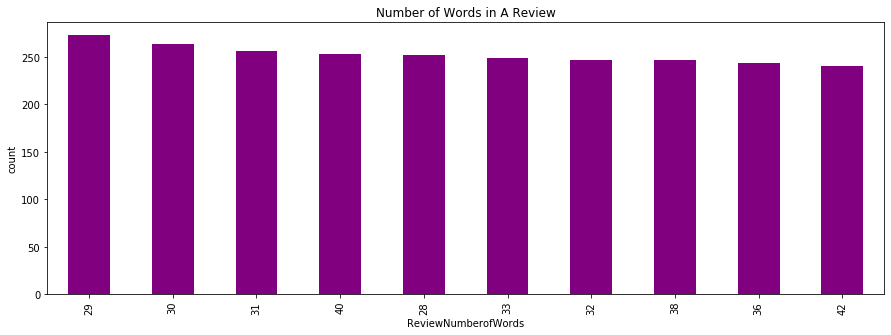

Text(0, 0.5, 'count')

In [0]:
# A visual look at the count/distribution of "Number of Words in A Review" in the dataset:-

df["ReviewNumberofWords"].value_counts()[:10].plot(kind='bar', color = 'purple')
plt.title("Number of Words in A Review")
plt.xlabel("ReviewNumberofWords")
plt.ylabel("count")

In [0]:
# A look at the count/distribution of "Number of Characters in A Review" in the dataset:-

df["ReviewLengthCharacters"].value_counts()[:10]

Out[39]: 159.0 71
185.0 68
146.0 64
215.0 64
266.0 60
 ..
698.0 14
570.0 14
699.0 14
642.0 13
10.0 13
Name: ReviewLengthCharacters, Length: 604, dtype: int64

Out[40]:

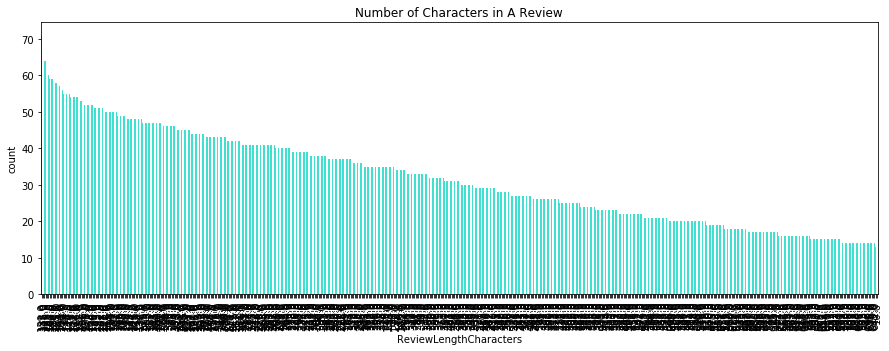

Text(0, 0.5, 'count')

In [0]:
# A visual look at the count/distribution of "Number of Characters in A Review" in the dataset:-

df["ReviewLengthCharacters"].value_counts()[:10].plot(kind='bar', color = 'turquoise')
plt.title("Number of Characters in A Review")
plt.xlabel("ReviewLengthCharacters")
plt.ylabel("count")

In [0]:
# A look at the count/distribution of "Top 10 Number of days between Joining Date and Posting Date" in the dataset:-

df["difference_in_datetime"].value_counts()[:10]

Out[41]: 205 days 66
218 days 54
57 days 51
243 days 51
235 days 50
225 days 50
214 days 49
189 days 48
254 days 48
342 days 47
Name: difference_in_datetime, dtype: int64

Out[42]:

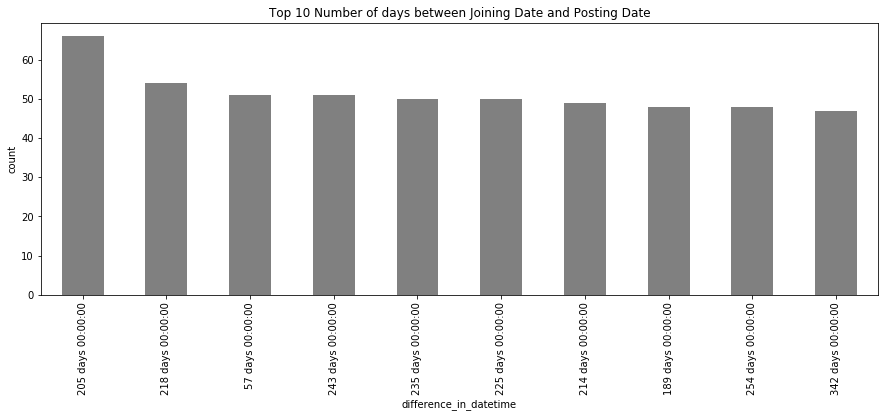

Text(0, 0.5, 'count')

In [0]:
# A visual look at the count/distribution of "Top 10 Number of days between Joining Date and Posting Date" in the dataset:-

df["difference_in_datetime"].value_counts()[:10].plot(kind='bar', color = 'grey')
plt.title("Top 10 Number of days between Joining Date and Posting Date")
plt.xlabel("difference_in_datetime")
plt.ylabel("count")

In [0]:
#Looking at the crosstable for "difference_in_datetime":-

difference_in_datetime_counts = pd.crosstab([df.difference_in_datetime], df.flagged.astype(bool))
difference_in_datetime_counts

Out[43]:

flagged,True
difference_in_datetime,
0 days,11
1 days,14
2 days,17
3 days,7
4 days,18
...,...
2486 days,1
2565 days,1
2583 days,1


In [0]:
# A look at the count/distribution by Gender:-

df["gender_Male"].value_counts()

Out[44]: 0 13019
1 10501
Name: gender_Male, dtype: int64

Out[45]:

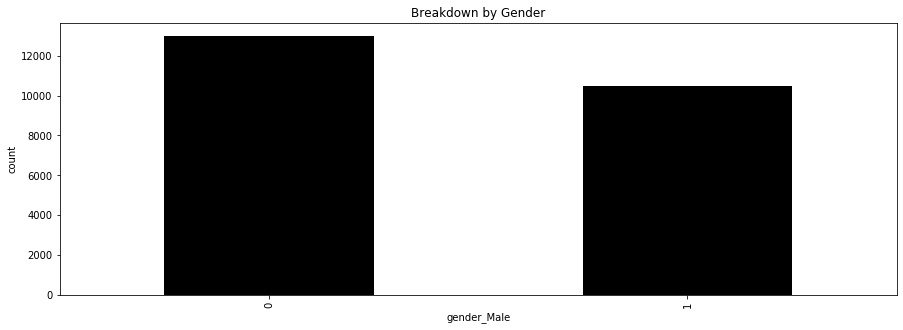

Text(0, 0.5, 'count')

In [0]:
# A visual look at the count/distribution by Gender:-

df["gender_Male"].value_counts().plot(kind='bar', color = 'black')
plt.title("Breakdown by Gender")
plt.xlabel("gender_Male")
plt.ylabel("count")

In [0]:
# A look at the count/distribution by Positively or Negatively Rated:-

df["Positively_Rated"].value_counts()

Out[46]: 1 19934
0 3586
Name: Positively_Rated, dtype: int64

Out[47]:

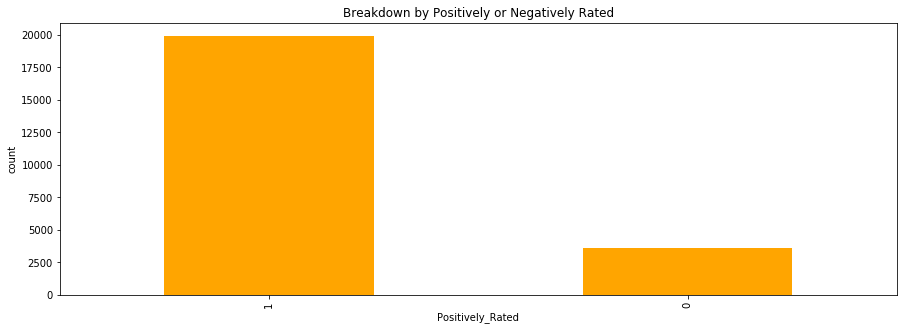

Text(0, 0.5, 'count')

In [0]:
# A visual look at the count/distribution by Positively or Negatively Rated:-

df["Positively_Rated"].value_counts().plot(kind='bar', color = 'orange')
plt.title("Breakdown by Positively or Negatively Rated")
plt.xlabel("Positively_Rated")
plt.ylabel("count")

# Tokenization

In [0]:
# Tokenization:-

import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

import re




from sklearn.base import BaseEstimator, TransformerMixin
from nltk.stem import PorterStemmer

df['reviewContent']=df['reviewContent'].apply(str) 

df.head()



df['tokenized_reviewContent'] = df['reviewContent'].apply(word_tokenize)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data] Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Package wordnet is already up-to-date!

In [0]:
# Screenshot of the first few rows in the DataFrame:-

df.head()

Out[49]:

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,ReviewLengthCharacters,difference_in_datetime,gender_Male,gender_female,Positively_Rated,tokenized_reviewContent
17290,2NXKOR58b9Y8d5,pP3kk0jkCvHp2cTPOoNDIQ,euO3-H92LCivH2B0CQPlnw,2012-07-31,5,0,let first say i like bbq going q saturday nigh...,N,Angela C.,"Chicago, IL",2009-01-10,15,9,1,6,1,1,0,0,0,4.0,0.083333,122,0.250,0.000000,619.0,1298 days,1,0,1,"[let, first, say, i, like, bbq, going, q, satu..."
11992,Opk1SNp3TIFmjukwGFoRrg,9VJfIysdpS_QuPErmm5N8w,-pO0hsi0xlF4FwqLGJUizg,2010-04-28,4,0,stop impulsively instead heading thai food the...,N,Kevin G.,"Chicago, IL",2010-01-03,0,20,1,9,1,6,1,1,0,4.0,0.083333,33,0.000,0.032193,194.0,115 days,0,1,1,"[stop, impulsively, instead, heading, thai, fo..."
5697,rqe6Y4OZOa0mbT29ZAF5EQ,Uh0dcgrCj5veZYlfXD8deg,ALwH81_sqskLmwfWS-_eeQ,2011-07-10,4,0,i came first time yesterday post civil union l...,N,amanda t.,"Chicago, IL",2009-01-05,20,12,0,2,1,3,0,8,0,4.0,0.166667,176,0.000,0.132616,913.0,916 days,0,1,1,"[i, came, first, time, yesterday, post, civil,..."
371,g2y3-XbTL6HdR,nYIH8IHzWp3j33L3qsAz5Q,pbEiXam9YJL3neCYHGwLUA,2010-03-12,5,3,have ever wonderland how oz i have form alinea...,N,Sheena M.,"Riverside, CA",2007-01-05,150,398,47,686,363,230,117,18,25,4.5,0.083333,564,0.125,0.145491,2899.0,1162 days,0,1,1,"[have, ever, wonderland, how, oz, i, have, for..."
9748,CDALI-rIuRpyFxvIe9R2Eg,7gTwt0Zsq-jOpqYOkjiMHQ,sR4EOfPuI-at41uIxIZPhw,2011-08-23,1,4,this place ridiculous slow good beer selection...,N,Gabriela A.,"Chicago, IL",2009-01-11,3,13,0,8,2,2,0,0,0,4.0,0.166667,23,0.750,0.025462,113.0,954 days,0,1,0,"[this, place, ridiculous, slow, good, beer, se..."


In [0]:
# Bag of words:-

from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = 'word')
df_bow = bow.fit_transform(df['reviewContent'])
df_bow

Out[50]: <23520x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 1034473 stored elements in Compressed Sparse Row format>

In [0]:
# Importing the necessary libraries:-

import os
import numpy as np 
import pandas as pd

In [0]:
# Screenshot of the first few rows in the DataFrame:-

df.head()

Out[52]:

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,ReviewLengthCharacters,difference_in_datetime,gender_Male,gender_female,Positively_Rated,tokenized_reviewContent
17290,2NXKOR58b9Y8d5,pP3kk0jkCvHp2cTPOoNDIQ,euO3-H92LCivH2B0CQPlnw,2012-07-31,5,0,let first say i like bbq going q saturday nigh...,N,Angela C.,"Chicago, IL",2009-01-10,15,9,1,6,1,1,0,0,0,4.0,0.083333,122,0.250,0.000000,619.0,1298 days,1,0,1,"[let, first, say, i, like, bbq, going, q, satu..."
11992,Opk1SNp3TIFmjukwGFoRrg,9VJfIysdpS_QuPErmm5N8w,-pO0hsi0xlF4FwqLGJUizg,2010-04-28,4,0,stop impulsively instead heading thai food the...,N,Kevin G.,"Chicago, IL",2010-01-03,0,20,1,9,1,6,1,1,0,4.0,0.083333,33,0.000,0.032193,194.0,115 days,0,1,1,"[stop, impulsively, instead, heading, thai, fo..."
5697,rqe6Y4OZOa0mbT29ZAF5EQ,Uh0dcgrCj5veZYlfXD8deg,ALwH81_sqskLmwfWS-_eeQ,2011-07-10,4,0,i came first time yesterday post civil union l...,N,amanda t.,"Chicago, IL",2009-01-05,20,12,0,2,1,3,0,8,0,4.0,0.166667,176,0.000,0.132616,913.0,916 days,0,1,1,"[i, came, first, time, yesterday, post, civil,..."
371,g2y3-XbTL6HdR,nYIH8IHzWp3j33L3qsAz5Q,pbEiXam9YJL3neCYHGwLUA,2010-03-12,5,3,have ever wonderland how oz i have form alinea...,N,Sheena M.,"Riverside, CA",2007-01-05,150,398,47,686,363,230,117,18,25,4.5,0.083333,564,0.125,0.145491,2899.0,1162 days,0,1,1,"[have, ever, wonderland, how, oz, i, have, for..."
9748,CDALI-rIuRpyFxvIe9R2Eg,7gTwt0Zsq-jOpqYOkjiMHQ,sR4EOfPuI-at41uIxIZPhw,2011-08-23,1,4,this place ridiculous slow good beer selection...,N,Gabriela A.,"Chicago, IL",2009-01-11,3,13,0,8,2,2,0,0,0,4.0,0.166667,23,0.750,0.025462,113.0,954 days,0,1,0,"[this, place, ridiculous, slow, good, beer, se..."


Additional Feature Engineering

5) Average Word Length of Each Review

In [0]:
# Calculating and Adding "Average Word Length" as a feature/column in the DataFrame:-

for index, row in df.iterrows():
  if row['reviewContent']:
    words = row['reviewContent'].split()
    df.loc[index, 'avg_word_len'] = sum(len(element) for element in words) / len(words)
  else:
    df.loc[index, 'avg_word_len'] = 0

In [0]:
# Screenshot of the first few rows in the DataFrame:-

df.head()

Out[54]:

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,ReviewLengthCharacters,difference_in_datetime,gender_Male,gender_female,Positively_Rated,tokenized_reviewContent,avg_word_len
17290,2NXKOR58b9Y8d5,pP3kk0jkCvHp2cTPOoNDIQ,euO3-H92LCivH2B0CQPlnw,2012-07-31,5,0,let first say i like bbq going q saturday nigh...,N,Angela C.,"Chicago, IL",2009-01-10,15,9,1,6,1,1,0,0,0,4.0,0.083333,122,0.250,0.000000,619.0,1298 days,1,0,1,"[let, first, say, i, like, bbq, going, q, satu...",5.073770
11992,Opk1SNp3TIFmjukwGFoRrg,9VJfIysdpS_QuPErmm5N8w,-pO0hsi0xlF4FwqLGJUizg,2010-04-28,4,0,stop impulsively instead heading thai food the...,N,Kevin G.,"Chicago, IL",2010-01-03,0,20,1,9,1,6,1,1,0,4.0,0.083333,33,0.000,0.032193,194.0,115 days,0,1,1,"[stop, impulsively, instead, heading, thai, fo...",5.878788
5697,rqe6Y4OZOa0mbT29ZAF5EQ,Uh0dcgrCj5veZYlfXD8deg,ALwH81_sqskLmwfWS-_eeQ,2011-07-10,4,0,i came first time yesterday post civil union l...,N,amanda t.,"Chicago, IL",2009-01-05,20,12,0,2,1,3,0,8,0,4.0,0.166667,176,0.000,0.132616,913.0,916 days,0,1,1,"[i, came, first, time, yesterday, post, civil,...",5.187500
371,g2y3-XbTL6HdR,nYIH8IHzWp3j33L3qsAz5Q,pbEiXam9YJL3neCYHGwLUA,2010-03-12,5,3,have ever wonderland how oz i have form alinea...,N,Sheena M.,"Riverside, CA",2007-01-05,150,398,47,686,363,230,117,18,25,4.5,0.083333,564,0.125,0.145491,2899.0,1162 days,0,1,1,"[have, ever, wonderland, how, oz, i, have, for...",5.140071
9748,CDALI-rIuRpyFxvIe9R2Eg,7gTwt0Zsq-jOpqYOkjiMHQ,sR4EOfPuI-at41uIxIZPhw,2011-08-23,1,4,this place ridiculous slow good beer selection...,N,Gabriela A.,"Chicago, IL",2009-01-11,3,13,0,8,2,2,0,0,0,4.0,0.166667,23,0.750,0.025462,113.0,954 days,0,1,0,"[this, place, ridiculous, slow, good, beer, se...",4.913043


In [0]:
##Preprocessing reviewscontent column before TF-IDF:-

features = df.iloc[:, 6].values
labels = df.iloc[:, 7].values

In [0]:
# A look at the "features":-

features

Out[56]: array(['let first say i like bbq going q saturday night choice i rather low expectations meal and high expectations leaving hungry but guess what i find giving place five stars wonderful surprise delicious food savory sauces opened eyes new bbq world i ordered smoked half chicken would highly recommend mustard sauce although can t go wrong four sauces bring table my friend manly dude is proudly ordered full stack ribs within minutes crumb left plate except cornbread it huge thick piece fresh spongy cornbread even finish it the atmosphere varies there s rather romantic lighting high tops front bar good date small group friends the back restaurant casual traditional tables suited larger boisterous groups bottom line get q enjoy way bbq done',
 'stop impulsively instead heading thai food the crispy chicken excellent moist tender chicken delightful crisp skin breading tis bit expensive worth looking fancier fare north if travel hot chocolate bucktown seems better money',
 'i came first time yesterday post civil union lunch type deal yay illinois getting program a group 25 trickled the newly unioned pair called week make sure would okay do beach red line stops north accommodating friendly it giving us individual checks keeping top groups needs handling orders timely manner given groups size the food great everyone seemed quite pleased ordered group ranging vegetarians pork enthusiasts i think says lot i little overwhelmed menu hardback illustrated deal roughly size children s book ultimately settled rice noodles stir fried veggies shrimp pineapple smoothie the noodles wide flat kind i expecting thin ones downside little bit harder eat chopsticks the pineapple smoothie second best irazu chunks fruit top excellent touch the piece watermelon mine fresh flavorful i kind bummed three chunks mango much i like mango makes tongue throat itch i elected sample it i person rod s referring short changed but great resolving issue though take minute convey situation due bit language barrier i ll definitely back i think next time i ll giving wonton soup go',
 ...,
 'catering simply awesome my friends i birthday party serving 50 people where else turn simply it i called ordered man took order anymore helpful funny he also asked first time ordering i replied yes to included extra half pan dumplings i grateful so food came time fresh hot ready serve the beef tender juicy so flavorful i went try chicken fried rice just world i also ordered avocado wontons shrimp springrolls lemongrass chicken full pan tilipia second pan beef asparagus in fact good i contemplating hiding food friends get anymore themselves it s good it s priced right tastes like i paid food much better anything i could find argyle i looking see restaurants would cater could find any i m glad i ordered simply it 5 stars amazingness',
 'superb cuban sandwiches the three us lechon cubano media noche we also empanadas the overall impression excellent quality food this place go quality cuban sandwiches excellent flavor taste we definitely coming back bringing cuban family enjoy',
 'amazing everything delicious meant shared we butternut squash salad rice butternut squash flat bread cheese inside honey drizzled top like italian style naan bread cheese amazing and giant ravioli stuffed even get desert defiantly going back'],
 dtype=object)

In [0]:
# A look at the "labels":-

labels

Out[57]: array(['N', 'N', 'N', ..., 'Y', 'N', 'N'], dtype=object)

In [0]:
# Creating a list of Processed Features:-

import re
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [0]:
# A look at the list of Processed Features:-

processed_features

Out[59]: ['let first say like bbq going saturday night choice rather low expectations meal and high expectations leaving hungry but guess what find giving place five stars wonderful surprise delicious food savory sauces opened eyes new bbq world ordered smoked half chicken would highly recommend mustard sauce although can go wrong four sauces bring table my friend manly dude is proudly ordered full stack ribs within minutes crumb left plate except cornbread it huge thick piece fresh spongy cornbread even finish it the atmosphere varies there rather romantic lighting high tops front bar good date small group friends the back restaurant casual traditional tables suited larger boisterous groups bottom line get enjoy way bbq done',
 'stop impulsively instead heading thai food the crispy chicken excellent moist tender chicken delightful crisp skin breading tis bit expensive worth looking fancier fare north if travel hot chocolate bucktown seems better money',
 'i came first time yesterday post civil union lunch type deal yay illinois getting program group 25 trickled the newly unioned pair called week make sure would okay do beach red line stops north accommodating friendly it giving us individual checks keeping top groups needs handling orders timely manner given groups size the food great everyone seemed quite pleased ordered group ranging vegetarians pork enthusiasts think says lot little overwhelmed menu hardback illustrated deal roughly size children book ultimately settled rice noodles stir fried veggies shrimp pineapple smoothie the noodles wide flat kind expecting thin ones downside little bit harder eat chopsticks the pineapple smoothie second best irazu chunks fruit top excellent touch the piece watermelon mine fresh flavorful kind bummed three chunks mango much like mango makes tongue throat itch elected sample it person rod referring short changed but great resolving issue though take minute convey situation due bit language barrier ll definitely back think next time ll giving wonton soup go',
 'have ever wonderland how oz have form alinea never knew whimsical places actually existed brought palate here course course fell deeper rabbit hole words like creative unique even come close describing fare served alinea grant achatz really modern day willy wonka as 4 year anniversary approached really felt suiting alinea spend in chicago become favorite city huge fan mr achatz we made reservation 29 course tour menu started counting days as made way pink glowing hallway heart racing excitement even though 30 minutes early reservation greeted name sat anyway we made way stairs eyes darting looking even small clue evening would bring us the minimalistic decor provides blank backdrop food really star caterpillar like cascade purple flowers sat behind dinner table set tone whimsy come the overall feel atmosphere genuinely fun there level service class without feeling stuffy pretentious no dish ever explained condescending manner waiter rude room filled laughter courses continued arrive some dishes shined others true molecular gastronomy fad others simply showcased simple amazing flavors the dishes greatest stars night follows course 5 do it your self pork belly spring roll at beginning meal presented 2 sheets rice paper beautifully draped small wooden stand in papers flowers herbs when course arrived assisted constructing sort tee pee rice paper sit in sweet succulent coconut curried pork belly spooned center chose additions plate 11 ingredients choose black sea salt lime onion additional herbs wrapped wrapped flavors dish whole night it far favorite it like thai street food made glamorous course 10 thai banana square frozen guinness beer mustard pecans truly wished course one bite definition balance course 12 powdered peanut butter mixed saliva returned original creamy peanut butter texture followed cayenne pepper in terms creativity felt dish stood amongst rest the way flavors developed peanut pepper indescribable course 13 foie 

In [0]:
# TF-IDF

# Bag of Words - In the bag of words approach, each word has the same weight. The idea behind the TF-IDF approach is that the words that occur less in all the documents and more in individual document contribute more towards classification.

# TF-IDF is a combination of two terms. Term frequency and Inverse Document frequency. They can be calculated as:

# TF = (Frequency of a word in the document)/(Total words in the document)

# IDF = Log((Total number of documents)/(Number of documents containing the word))

In [0]:
# Install the "nltk" package:-

%%sh
pip install nltk

Requirement already satisfied: nltk in /databricks/python3/lib/python3.7/site-packages (3.6.2)
Requirement already satisfied: joblib in /databricks/python3/lib/python3.7/site-packages (from nltk) (0.14.1)
Requirement already satisfied: tqdm in /databricks/python3/lib/python3.7/site-packages (from nltk) (4.60.0)
Requirement already satisfied: regex in /databricks/python3/lib/python3.7/site-packages (from nltk) (2021.4.4)
Requirement already satisfied: click in /databricks/python3/lib/python3.7/site-packages (from nltk) (7.1.2)
WARNING: You are using pip version 20.0.2; however, version 21.1.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python3.7 -m pip install --upgrade pip' command.

In [0]:
# Import the "nltk" library:-

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data] Package stopwords is already up-to-date!

In [0]:
# Install the "sklearn" package:-

%%sh
pip install sklearn

Requirement already satisfied: sklearn in /databricks/python3/lib/python3.7/site-packages (0.0)
Requirement already satisfied: scikit-learn in /databricks/python3/lib/python3.7/site-packages (from sklearn) (0.22.1)
Requirement already satisfied: joblib>=0.11 in /databricks/python3/lib/python3.7/site-packages (from scikit-learn->sklearn) (0.14.1)
Requirement already satisfied: numpy>=1.11.0 in /databricks/python3/lib/python3.7/site-packages (from scikit-learn->sklearn) (1.18.1)
Requirement already satisfied: scipy>=0.17.0 in /databricks/python3/lib/python3.7/site-packages (from scikit-learn->sklearn) (1.4.1)
WARNING: You are using pip version 20.0.2; however, version 21.1.1 is available.
You should consider upgrading via the '/databricks/python3/bin/python3.7 -m pip install --upgrade pip' command.

In [0]:
# Import the "TfidfVectorizer" library from "sklearn", and develop a list of Processed Features:-

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [0]:
# A look at the Processed Features:-

processed_features

Out[65]: array([[0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.],
 ...,
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.],
 [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
# A look at the length of Processed Features:-

len(processed_features)

Out[66]: 23520

In [0]:
# Creating a column for Processed Features in the DataFrame, and adding them as a list:-

df['processed_features'] = processed_features.tolist()

In [0]:
# Screenshot of the first few rows in the DataFrame:-

df.head()

Out[68]:

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,ReviewLengthCharacters,difference_in_datetime,gender_Male,gender_female,Positively_Rated,tokenized_reviewContent,avg_word_len,processed_features
17290,2NXKOR58b9Y8d5,pP3kk0jkCvHp2cTPOoNDIQ,euO3-H92LCivH2B0CQPlnw,2012-07-31,5,0,let first say i like bbq going q saturday nigh...,N,Angela C.,"Chicago, IL",2009-01-10,15,9,1,6,1,1,0,0,0,4.0,0.083333,122,0.250,0.000000,619.0,1298 days,1,0,1,"[let, first, say, i, like, bbq, going, q, satu...",5.073770,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
11992,Opk1SNp3TIFmjukwGFoRrg,9VJfIysdpS_QuPErmm5N8w,-pO0hsi0xlF4FwqLGJUizg,2010-04-28,4,0,stop impulsively instead heading thai food the...,N,Kevin G.,"Chicago, IL",2010-01-03,0,20,1,9,1,6,1,1,0,4.0,0.083333,33,0.000,0.032193,194.0,115 days,0,1,1,"[stop, impulsively, instead, heading, thai, fo...",5.878788,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
5697,rqe6Y4OZOa0mbT29ZAF5EQ,Uh0dcgrCj5veZYlfXD8deg,ALwH81_sqskLmwfWS-_eeQ,2011-07-10,4,0,i came first time yesterday post civil union l...,N,amanda t.,"Chicago, IL",2009-01-05,20,12,0,2,1,3,0,8,0,4.0,0.166667,176,0.000,0.132616,913.0,916 days,0,1,1,"[i, came, first, time, yesterday, post, civil,...",5.187500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
371,g2y3-XbTL6HdR,nYIH8IHzWp3j33L3qsAz5Q,pbEiXam9YJL3neCYHGwLUA,2010-03-12,5,3,have ever wonderland how oz i have form alinea...,N,Sheena M.,"Riverside, CA",2007-01-05,150,398,47,686,363,230,117,18,25,4.5,0.083333,564,0.125,0.145491,2899.0,1162 days,0,1,1,"[have, ever, wonderland, how, oz, i, have, for...",5.140071,"[0.0, 0.03091188729247926, 0.0, 0.042907940253..."
9748,CDALI-rIuRpyFxvIe9R2Eg,7gTwt0Zsq-jOpqYOkjiMHQ,sR4EOfPuI-at41uIxIZPhw,2011-08-23,1,4,this place ridiculous slow good beer selection...,N,Gabriela A.,"Chicago, IL",2009-01-11,3,13,0,8,2,2,0,0,0,4.0,0.166667,23,0.750,0.025462,113.0,954 days,0,1,0,"[this, place, ridiculous, slow, good, beer, se...",4.913043,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


# Model Building

Prepping the data for use in the models

In [0]:
# Importing all the necessary libraries and packages:-

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import time

In [0]:
# Taking a look at the data types of all the features:-

df.dtypes

Out[70]: reviewID object
reviewerID object
restaurantID object
date datetime64[ns]
rating int64
reviewUsefulCount int64
reviewContent object
flagged object
name object
location object
yelpJoinDate datetime64[ns]
friendCount int64
reviewCount int64
firstCount int64
usefulCount int64
coolCount int64
funnyCount int64
complimentCount int64
tipCount int64
fanCount int64
restaurantRating float64
MaximumNumberOfReviews-Day float64
ReviewNumberofWords int64
ReviewDeviation float64
Maximum Content Similarity float64
ReviewLengthCharacters float64
difference_in_datetime timedelta64[ns]
gender_Male uint8
gender_female uint8
Positively_Rated int64
tokenized_reviewContent object
avg_word_len float64
processed_features object
dtype: object

In [0]:
# Taking a look at the general shape of the DataFrame:-

df.shape

Out[71]: (23520, 33)

In [0]:
# Converting the "tokenized_reviewContent, processed_features, reviewID, and location" features to a String data type, so that we can Encode them in the next step:-

df['tokenized_reviewContent'] = df['tokenized_reviewContent'].astype(str)
df['processed_features'] = df['processed_features'].astype(str)
df['reviewID'] = df['reviewID'].astype(str)
df['location'] = df['location'].astype(str)

II. Encoding Categorical Features/Columns using "LabelEncoder"

In [0]:
# Encoding the Categorical Features/Columns with dummy values, in order to add them to the models:- 

from sklearn.preprocessing import LabelEncoder
df['reviewID_encoded'] = LabelEncoder().fit_transform(df.reviewID)
df['reviewerID_encoded'] = LabelEncoder().fit_transform(df.reviewerID)
df['restaurantID_encoded'] = LabelEncoder().fit_transform(df.restaurantID)
df['reviewContent_encoded'] = LabelEncoder().fit_transform(df.reviewContent)
df['name_encoded'] = LabelEncoder().fit_transform(df.name)
df['location_encoded'] = LabelEncoder().fit_transform(df.location)
df['tokenized_reviewContent_encoded'] = LabelEncoder().fit_transform(df.tokenized_reviewContent)
df['processed_features_encoded'] = LabelEncoder().fit_transform(df.processed_features)
df['date_encoded'] = LabelEncoder().fit_transform(df.date)
df['yelpJoinDate_encoded'] = LabelEncoder().fit_transform(df.yelpJoinDate)
df['difference_in_datetime_encoded'] = LabelEncoder().fit_transform(df.difference_in_datetime)
df.head()

Out[73]:

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,ReviewLengthCharacters,difference_in_datetime,gender_Male,gender_female,Positively_Rated,tokenized_reviewContent,avg_word_len,processed_features,reviewID_encoded,reviewerID_encoded,restaurantID_encoded,reviewContent_encoded,name_encoded,location_encoded,tokenized_reviewContent_encoded,processed_features_encoded,date_encoded,yelpJoinDate_encoded,difference_in_datetime_encoded
17290,2NXKOR58b9Y8d5,pP3kk0jkCvHp2cTPOoNDIQ,euO3-H92LCivH2B0CQPlnw,2012-07-31,5,0,let first say i like bbq going q saturday nigh...,N,Angela C.,"Chicago, IL",2009-01-10,15,9,1,6,1,1,0,0,0,4.0,0.083333,122,0.250,0.000000,619.0,1298 days,1,0,1,"['let', 'first', 'say', 'i', 'like', 'bbq', 'g...",5.073770,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1268,12852,75,12389,674,245,12389,9679,2297,60,1296
11992,Opk1SNp3TIFmjukwGFoRrg,9VJfIysdpS_QuPErmm5N8w,-pO0hsi0xlF4FwqLGJUizg,2010-04-28,4,0,stop impulsively instead heading thai food the...,N,Kevin G.,"Chicago, IL",2010-01-03,0,20,1,9,1,6,1,1,0,4.0,0.083333,33,0.000,0.032193,194.0,115 days,0,1,1,"['stop', 'impulsively', 'instead', 'heading', ...",5.878788,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9590,2485,0,16875,5894,245,16875,1874,1472,65,115
5697,rqe6Y4OZOa0mbT29ZAF5EQ,Uh0dcgrCj5veZYlfXD8deg,ALwH81_sqskLmwfWS-_eeQ,2011-07-10,4,0,i came first time yesterday post civil union l...,N,amanda t.,"Chicago, IL",2009-01-05,20,12,0,2,1,3,0,8,0,4.0,0.166667,176,0.000,0.132616,913.0,916 days,0,1,1,"['i', 'came', 'first', 'time', 'yesterday', 'p...",5.187500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",20539,7541,23,6578,10853,245,6578,19541,1910,55,916
371,g2y3-XbTL6HdR,nYIH8IHzWp3j33L3qsAz5Q,pbEiXam9YJL3neCYHGwLUA,2010-03-12,5,3,have ever wonderland how oz i have form alinea...,N,Sheena M.,"Riverside, CA",2007-01-05,150,398,47,686,363,230,117,18,25,4.5,0.083333,564,0.125,0.145491,2899.0,1162 days,0,1,1,"['have', 'ever', 'wonderland', 'how', 'oz', 'i...",5.140071,"[0.0, 0.03091188729247926, 0.0, 0.042907940253...",16151,12387,98,5840,9503,1069,5840,21971,1425,31,1162
9748,CDALI-rIuRpyFxvIe9R2Eg,7gTwt0Zsq-jOpqYOkjiMHQ,sR4EOfPuI-at41uIxIZPhw,2011-08-23,1,4,this place ridiculous slow good beer selection...,N,Gabriela A.,"Chicago, IL",2009-01-11,3,13,0,8,2,2,0,0,0,4.0,0.166667,23,0.750,0.025462,113.0,954 days,0,1,0,"['this', 'place', 'ridiculous', 'slow', 'good'...",4.913043,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4891,2056,106,19866,3549,245,19866,17764,1954,61,954


We decided to use "sklearn's - LabelEncoder", to encode all the categorical features, as it essentially creates just one encoded column/feature for each categorical feature, instead of having multiple  columns/features for each and every category/element within that feature. It essentially creates a more manageble number of columns, and does not create an unnecessary number of columns, which would only complicate our analysis and models to come.

In [0]:
# Screenshot of the DataFrame, with all the Encoded Columns added to the far right - Please use the scroll bar below the DataFrame to scroll to the far right, to examine the encoded columns:-

df.head()

Out[74]:

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,yelpJoinDate,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,ReviewLengthCharacters,difference_in_datetime,gender_Male,gender_female,Positively_Rated,tokenized_reviewContent,avg_word_len,processed_features,reviewID_encoded,reviewerID_encoded,restaurantID_encoded,reviewContent_encoded,name_encoded,location_encoded,tokenized_reviewContent_encoded,processed_features_encoded,date_encoded,yelpJoinDate_encoded,difference_in_datetime_encoded
17290,2NXKOR58b9Y8d5,pP3kk0jkCvHp2cTPOoNDIQ,euO3-H92LCivH2B0CQPlnw,2012-07-31,5,0,let first say i like bbq going q saturday nigh...,N,Angela C.,"Chicago, IL",2009-01-10,15,9,1,6,1,1,0,0,0,4.0,0.083333,122,0.250,0.000000,619.0,1298 days,1,0,1,"['let', 'first', 'say', 'i', 'like', 'bbq', 'g...",5.073770,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1268,12852,75,12389,674,245,12389,9679,2297,60,1296
11992,Opk1SNp3TIFmjukwGFoRrg,9VJfIysdpS_QuPErmm5N8w,-pO0hsi0xlF4FwqLGJUizg,2010-04-28,4,0,stop impulsively instead heading thai food the...,N,Kevin G.,"Chicago, IL",2010-01-03,0,20,1,9,1,6,1,1,0,4.0,0.083333,33,0.000,0.032193,194.0,115 days,0,1,1,"['stop', 'impulsively', 'instead', 'heading', ...",5.878788,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",9590,2485,0,16875,5894,245,16875,1874,1472,65,115
5697,rqe6Y4OZOa0mbT29ZAF5EQ,Uh0dcgrCj5veZYlfXD8deg,ALwH81_sqskLmwfWS-_eeQ,2011-07-10,4,0,i came first time yesterday post civil union l...,N,amanda t.,"Chicago, IL",2009-01-05,20,12,0,2,1,3,0,8,0,4.0,0.166667,176,0.000,0.132616,913.0,916 days,0,1,1,"['i', 'came', 'first', 'time', 'yesterday', 'p...",5.187500,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",20539,7541,23,6578,10853,245,6578,19541,1910,55,916
371,g2y3-XbTL6HdR,nYIH8IHzWp3j33L3qsAz5Q,pbEiXam9YJL3neCYHGwLUA,2010-03-12,5,3,have ever wonderland how oz i have form alinea...,N,Sheena M.,"Riverside, CA",2007-01-05,150,398,47,686,363,230,117,18,25,4.5,0.083333,564,0.125,0.145491,2899.0,1162 days,0,1,1,"['have', 'ever', 'wonderland', 'how', 'oz', 'i...",5.140071,"[0.0, 0.03091188729247926, 0.0, 0.042907940253...",16151,12387,98,5840,9503,1069,5840,21971,1425,31,1162
9748,CDALI-rIuRpyFxvIe9R2Eg,7gTwt0Zsq-jOpqYOkjiMHQ,sR4EOfPuI-at41uIxIZPhw,2011-08-23,1,4,this place ridiculous slow good beer selection...,N,Gabriela A.,"Chicago, IL",2009-01-11,3,13,0,8,2,2,0,0,0,4.0,0.166667,23,0.750,0.025462,113.0,954 days,0,1,0,"['this', 'place', 'ridiculous', 'slow', 'good'...",4.913043,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",4891,2056,106,19866,3549,245,19866,17764,1954,61,954


In [0]:
# Taking a look at the data types of all the features, to ensure all the encoded ones are of an "Numeric" data type:-

df.dtypes

Out[75]: reviewID object
reviewerID object
restaurantID object
date datetime64[ns]
rating int64
reviewUsefulCount int64
reviewContent object
flagged object
name object
location object
yelpJoinDate datetime64[ns]
friendCount int64
reviewCount int64
firstCount int64
usefulCount int64
coolCount int64
funnyCount int64
complimentCount int64
tipCount int64
fanCount int64
restaurantRating float64
MaximumNumberOfReviews-Day float64
ReviewNumberofWords int64
ReviewDeviation float64
Maximum Content Similarity float64
ReviewLengthCharacters float64
difference_in_datetime timedelta64[ns]
gender_Male uint8
gender_female uint8
Positively_Rated int64
tokenized_reviewContent object
avg_word_len float64
processed_features object
reviewID_encoded int64
reviewerID_encoded int64
restaurantID_encoded int64
reviewContent_encoded int64
name_encoded int64
location_encoded int64
tokenized_reviewContent_encoded int64
processed_features_encoded int64
date_encoded int64
yelpJoinDate_encoded int64
difference_in_datetime_encoded int64
dtype: object

In [0]:
# Taking a look at the REVISED general shape of the DataFrame:-

df.shape

Out[76]: (23520, 44)

In [0]:
# Examine the current class distribution for the "flagged" variable:-

pd.crosstab(index = df['flagged'], columns="Total count")

Out[77]:

col_0,Total count
flagged,
N,17823
Y,5697


In [0]:
# Encoding the "flagged" column/feature with dummy values, "0" and "1", in order to effectively add it to the models:-

df['flagged_encoded'] = LabelEncoder().fit_transform(df.flagged)

In [0]:
# A quick look at the new set of features, after encodeing the "flagged" feature:-

df.dtypes

Out[79]: reviewID object
reviewerID object
restaurantID object
date datetime64[ns]
rating int64
reviewUsefulCount int64
reviewContent object
flagged object
name object
location object
yelpJoinDate datetime64[ns]
friendCount int64
reviewCount int64
firstCount int64
usefulCount int64
coolCount int64
funnyCount int64
complimentCount int64
tipCount int64
fanCount int64
restaurantRating float64
MaximumNumberOfReviews-Day float64
ReviewNumberofWords int64
ReviewDeviation float64
Maximum Content Similarity float64
ReviewLengthCharacters float64
difference_in_datetime timedelta64[ns]
gender_Male uint8
gender_female uint8
Positively_Rated int64
tokenized_reviewContent object
avg_word_len float64
processed_features object
reviewID_encoded int64
reviewerID_encoded int64
restaurantID_encoded int64
reviewContent_encoded int64
name_encoded int64
location_encoded int64
tokenized_reviewContent_encoded int64
processed_features_encoded int64
date_encoded int64
yelpJoinDate_encoded int64
difference_in_datetime_encoded int64
flagged_encoded int64
dtype: object

III. Re-arranging all the features/columns in the DataFrame, to keep all the Numeric Data Types together and the String Data Types together. This is not just for visual purposes, but most importantly, it will enable us to conduct a train-test split more effectively later on.

In [0]:
# Re-arranging the features/columns in the Revised DataFrame:-

column_names = ["flagged", "reviewID", "reviewerID", "restaurantID", "reviewContent", "name", "location", "tokenized_reviewContent", "processed_features", "date", "yelpJoinDate", "difference_in_datetime", "flagged_encoded", "rating", "reviewUsefulCount", "friendCount", "reviewCount", "firstCount", "usefulCount", "coolCount", "funnyCount", "complimentCount", "tipCount", "fanCount", "restaurantRating", "MaximumNumberOfReviews-Day", "ReviewNumberofWords", "ReviewDeviation", "Maximum Content Similarity", "ReviewLengthCharacters", "gender_Male", "gender_female", "Positively_Rated", "avg_word_len", "reviewID_encoded", "reviewerID_encoded", "restaurantID_encoded", "reviewContent_encoded", "name_encoded", "location_encoded", "tokenized_reviewContent_encoded", "processed_features_encoded", "date_encoded", "yelpJoinDate_encoded", "difference_in_datetime_encoded"]
df = df.reindex(columns=column_names)

In [0]:
# Looking at the column data types, and the revised order of the columns/features:-

df.dtypes

Out[81]: flagged object
reviewID object
reviewerID object
restaurantID object
reviewContent object
name object
location object
tokenized_reviewContent object
processed_features object
date datetime64[ns]
yelpJoinDate datetime64[ns]
difference_in_datetime timedelta64[ns]
flagged_encoded int64
rating int64
reviewUsefulCount int64
friendCount int64
reviewCount int64
firstCount int64
usefulCount int64
coolCount int64
funnyCount int64
complimentCount int64
tipCount int64
fanCount int64
restaurantRating float64
MaximumNumberOfReviews-Day float64
ReviewNumberofWords int64
ReviewDeviation float64
Maximum Content Similarity float64
ReviewLengthCharacters float64
gender_Male uint8
gender_female uint8
Positively_Rated int64
avg_word_len float64
reviewID_encoded int64
reviewerID_encoded int64
restaurantID_encoded int64
reviewContent_encoded int64
name_encoded int64
location_encoded int64
tokenized_reviewContent_encoded int64
processed_features_encoded int64
date_encoded int64
yelpJoinDate_encoded int64
difference_in_datetime_encoded int64
dtype: object

In [0]:
# Taking a look at the REVISED general shape of the DataFrame after re-arranging the columns, to ensure we did not miss any columns, and retain all 45 columns:-

df.shape

Out[82]: (23520, 45)

IV. Revised Correlation Analysis -

After encoding categorical variables, our next focus area was to develop and use a correlation matrix, to identify which features (predictive variables (x variables)) are highly correlated with each other. This forms part of our Feature Reduction process, to avoid issues of multicollinearity, and improve the predictive capabilities and the trustworthiness of our models.

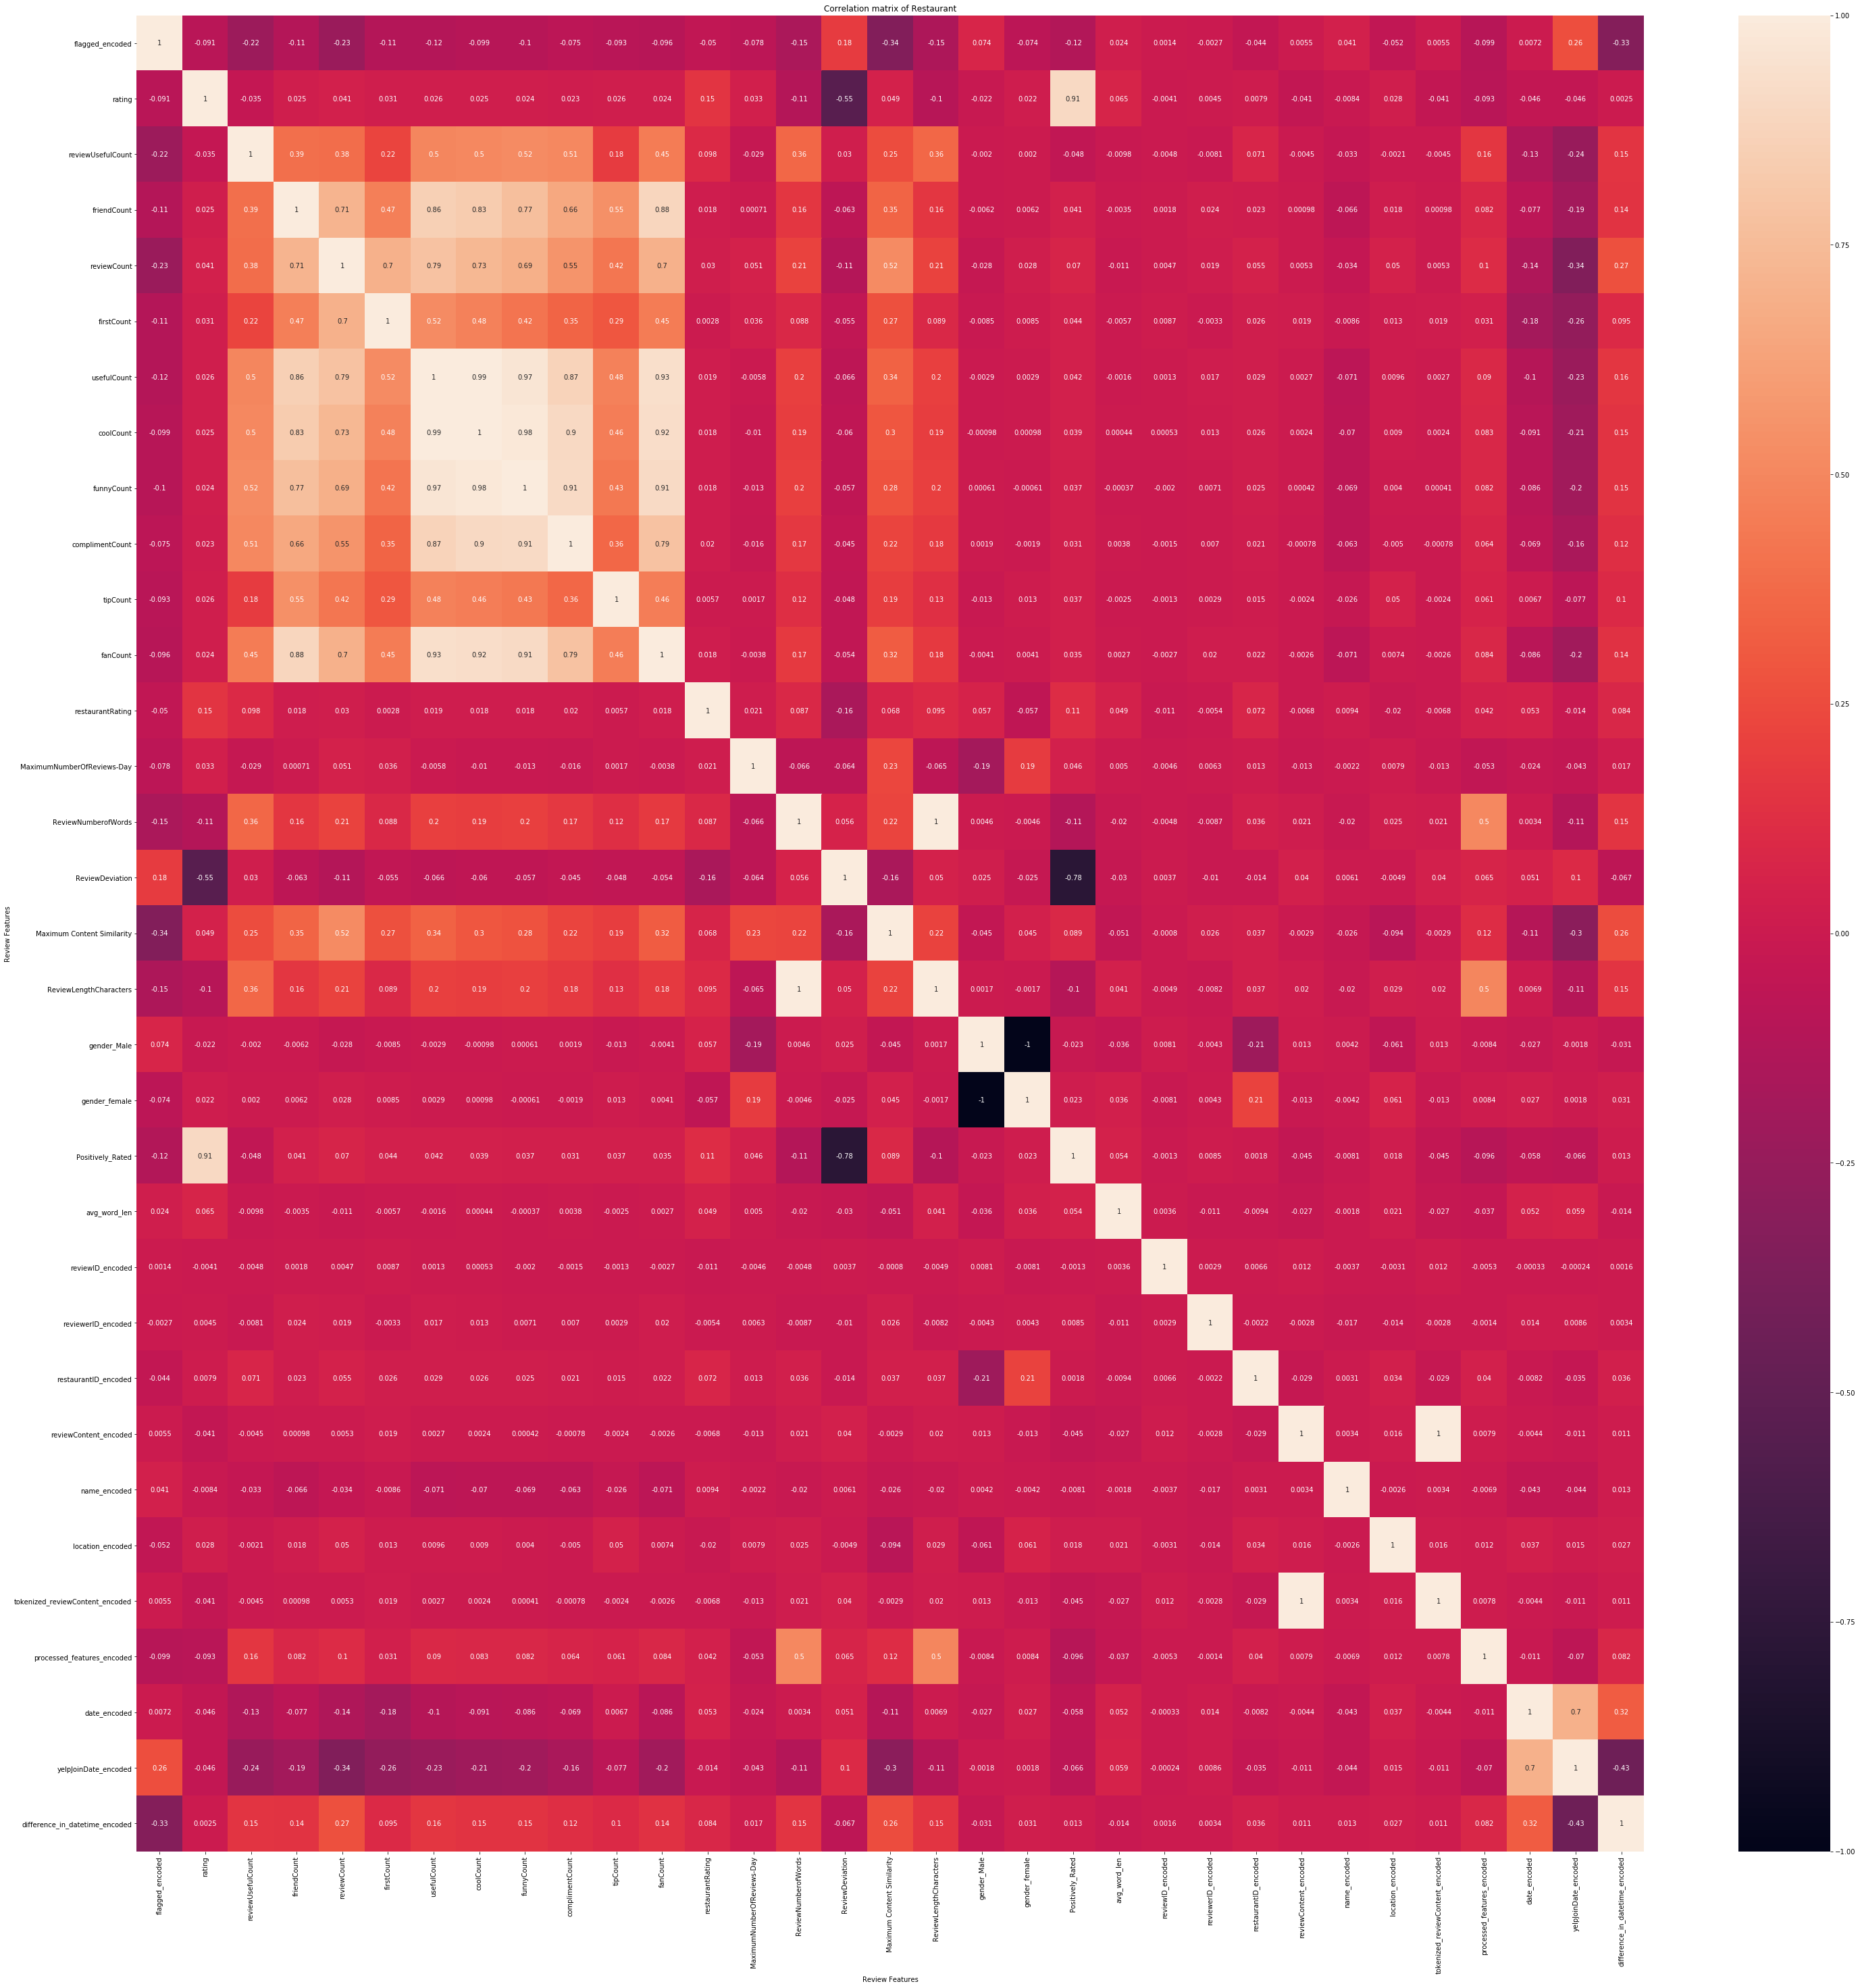

In [0]:
# Correlation matrix for all Numeric Features/Columns:-

import seaborn as sns

import matplotlib.pyplot as plt
f = plt.figure(figsize=(50, 50))

df_small = df.iloc[12:,:45]

correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of Restaurant")

plt.xlabel("Review Features")

plt.ylabel("Review Features")

plt.show()

As you can see from the vertical scale on the far right, the lighter and the darker the color, the higher the correlation there is. Keeping a threshold of 0.60, we decided to remove those variables that had a correlation of 0.6 and above, in order to avoid the problem of multicollinearity. We felt a correlation of 0.6 or higher would capture most of the multicollinearity issues, and thus we used 0.6 as our threshold.

In [0]:
# Another look at the Correlation Matrix, in a different format:-

correlation_mat

Out[84]:

,flagged_encoded,rating,reviewUsefulCount,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,ReviewLengthCharacters,gender_Male,gender_female,Positively_Rated,avg_word_len,reviewID_encoded,reviewerID_encoded,restaurantID_encoded,reviewContent_encoded,name_encoded,location_encoded,tokenized_reviewContent_encoded,processed_features_encoded,date_encoded,yelpJoinDate_encoded,difference_in_datetime_encoded
flagged_encoded,1.000000,-0.090639,-0.220391,-0.113826,-0.227946,-0.110169,-0.115538,-0.098874,-0.099948,-0.075279,-0.093276,-0.096472,-0.050412,-0.077856,-0.150376,0.183812,-0.336568,-0.146399,0.074461,-0.074461,-0.117494,0.024018,0.001400,-0.002717,-0.043816,0.005456,0.041453,-0.051656,0.005474,-0.098543,0.007220,0.262638,-0.333944
rating,-0.090639,1.000000,-0.035477,0.025058,0.041395,0.031185,0.025524,0.024788,0.024380,0.023068,0.025899,0.023647,0.150418,0.032540,-0.110610,-0.545299,0.049158,-0.100968,-0.022333,0.022333,0.905449,0.065290,-0.004073,0.004506,0.007888,-0.041376,-0.008421,0.027791,-0.041367,-0.093229,-0.045698,-0.046407,0.002463
reviewUsefulCount,-0.220391,-0.035477,1.000000,0.392942,0.383942,0.220350,0.498637,0.500830,0.516936,0.507109,0.184449,0.451886,0.097581,-0.029028,0.364159,0.029806,0.253475,0.363616,-0.002030,0.002030,-0.048130,-0.009761,-0.004848,-0.008051,0.070908,-0.004455,-0.033087,-0.002068,-0.004465,0.162062,-0.131225,-0.239633,0.152232
friendCount,-0.113826,0.025058,0.392942,1.000000,0.713401,0.466754,0.856769,0.828266,0.772803,0.655069,0.546703,0.883406,0.018060,0.000714,0.159735,-0.063388,0.349037,0.160490,-0.006235,0.006235,0.040599,-0.003455,0.001816,0.023989,0.023390,0.000981,-0.065920,0.017658,0.000978,0.081982,-0.077123,-0.192192,0.143856
reviewCount,-0.227946,0.041395,0.383942,0.713401,1.000000,0.700005,0.788434,0.731278,0.689165,0.554908,0.423377,0.698799,0.029550,0.051164,0.211189,-0.114934,0.523041,0.212632,-0.027762,0.027762,0.070282,-0.010909,0.004703,0.019394,0.054666,0.005334,-0.034451,0.049993,0.005328,0.102552,-0.136456,-0.344435,0.267026
firstCount,-0.110169,0.031185,0.220350,0.466754,0.700005,1.000000,0.522750,0.475867,0.421088,0.346706,0.289844,0.446808,0.002791,0.036253,0.088246,-0.054550,0.272217,0.088817,-0.008475,0.008475,0.043679,-0.005743,0.008723,-0.003341,0.025798,0.019038,-0.008569,0.012907,0.019035,0.031391,-0.180961,-0.259824,0.095375
usefulCount,-0.115538,0.025524,0.498637,0.856769,0.788434,0.522750,1.000000,0.992421,0.968070,0.870575,0.475720,0.931392,0.019217,-0.005803,0.198439,-0.066360,0.340663,0.200956,-0.002888,0.002888,0.042071,-0.001584,0.001347,0.016905,0.029364,0.002722,-0.071241,0.009558,0.002718,0.090019,-0.101676,-0.229997,0.163563
coolCount,-0.098874,0.024788,0.500830,0.828266,0.731278,0.475867,0.992421,1.000000,0.983754,0.898502,0.460093,0.923892,0.017769,-0.010166,0.189662,-0.059816,0.296082,0.192587,-0.000983,0.000983,0.039241,0.000443,0.000532,0.013313,0.025936,0.002418,-0.069931,0.009025,0.002415,0.082606,-0.091239,-0.207047,0.147880
funnyCount,-0.099948,0.024380,0.516936,0.772803,0.689165,0.421088,0.968070,0.983754,1.000000,0.910455,0.431542,0.909731,0.017539,-0.013119,0.196736,-0.056504,0.280693,0.199773,0.000607,-0.000607,0.037058,-0.000366,-0.002033,0.007143,0.024861,0.000416,-0.069412,0.003983,0.000413,0.081625,-0.085645,-0.199493,0.147045
complimentCount,-0.075279,0.023068,0.507109,0.655069,0.554908,0.346706,0.870575,0.898502,0.910455,1.000000,0.363916,0.788454,0.019778,-0.015657,0.171354,-0.045358,0.224080,0.175496,0.001903,-0.001903,0.031347,0.003819,-0.001524,0.006978,0.020854,-0.000776,-0.062660,-0.005047,-0.000779,0.063769,-0.068833,-0.163464,0.123113


#Dimension Reduction

We decided to use a Correlation threshold of 0.60 (>=0.60), and thus remove any predictive (x) features with a correlation of 0.60 or above, with other predictive (x) features, to reduce the effects of multicollinearity in our predictive models.

In [0]:
# Finding highly correlated features (>=0.60):-

correlated_features = set()

for i in range(len(correlation_mat.columns)):
    for j in range(i):
        if abs(correlation_mat.iloc[i, j]) >= 0.6:
            colname = correlation_mat.columns[i]
            correlated_features.add(colname)

In [0]:
# Checking the number of highly correlated features:-

len(correlated_features)

Out[86]: 12

In [0]:
# Looking at all the highly correlated features:-

print (correlated_features)

{'usefulCount', 'coolCount', 'gender_female', 'reviewCount', 'tokenized_reviewContent_encoded', 'firstCount', 'complimentCount', 'funnyCount', 'yelpJoinDate_encoded', 'Positively_Rated', 'fanCount', 'ReviewLengthCharacters'}

In [0]:
# Creating a revised Dataframe created after removal of highly correlated features of 0.60 and above:-

column_names = ["flagged_encoded", "rating", "reviewUsefulCount", "friendCount",  "tipCount", "restaurantRating", "MaximumNumberOfReviews-Day", "ReviewNumberofWords", "ReviewDeviation", "Maximum Content Similarity", "gender_Male", "avg_word_len", "reviewID_encoded", "reviewerID_encoded", "restaurantID_encoded", "reviewContent_encoded", "name_encoded", "location_encoded", "processed_features_encoded", "date_encoded", "difference_in_datetime_encoded"]
df = df.reindex(columns=column_names)

In [0]:
# A look at the revised shape of our DataFrame:-

df.shape

In [0]:
# A look at the revised basic Correlation Matrix:-

df.corr()

Out[89]:

,flagged_encoded,rating,reviewUsefulCount,friendCount,tipCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,gender_Male,avg_word_len,reviewID_encoded,reviewerID_encoded,restaurantID_encoded,reviewContent_encoded,name_encoded,location_encoded,processed_features_encoded,date_encoded,difference_in_datetime_encoded
flagged_encoded,1.000000,-0.090608,-0.220433,-0.113795,-0.093280,-0.050513,-0.077959,-0.150430,0.183732,-0.336530,0.074552,0.024024,0.001437,-0.002779,-0.043837,0.005462,0.041502,-0.051623,-0.098601,0.007233,-0.333895
rating,-0.090608,1.000000,-0.035640,0.025071,0.025890,0.150430,0.032296,-0.110086,-0.545354,0.049157,-0.022342,0.065313,-0.003909,0.004775,0.007825,-0.041686,-0.008467,0.027951,-0.093229,-0.045733,0.002267
reviewUsefulCount,-0.220433,-0.035640,1.000000,0.392835,0.184368,0.097700,-0.029041,0.364120,0.030101,0.253433,-0.002090,-0.009873,-0.004878,-0.008106,0.071098,-0.004438,-0.033060,-0.001959,0.162265,-0.131233,0.152300
friendCount,-0.113795,0.025071,0.392835,1.000000,0.546676,0.018098,0.000686,0.159669,-0.063407,0.349009,-0.006243,-0.003448,0.001818,0.024010,0.023376,0.000992,-0.065875,0.017701,0.081955,-0.077120,0.143847
tipCount,-0.093280,0.025890,0.184368,0.546676,1.000000,0.005736,0.001825,0.124371,-0.048118,0.189988,-0.013474,-0.002505,-0.001475,0.002960,0.014719,-0.002277,-0.025648,0.049543,0.060789,0.006681,0.100705
restaurantRating,-0.050513,0.150430,0.097700,0.018098,0.005736,1.000000,0.021187,0.088081,-0.163726,0.067889,0.056543,0.049101,-0.011257,-0.005260,0.072440,-0.006891,0.009458,-0.020038,0.042334,0.053210,0.084337
MaximumNumberOfReviews-Day,-0.077959,0.032296,-0.029041,0.000686,0.001825,0.021187,1.000000,-0.066210,-0.063942,0.229746,-0.185179,0.005120,-0.004754,0.006409,0.013395,-0.013403,-0.002299,0.007720,-0.053443,-0.024038,0.017253
ReviewNumberofWords,-0.150430,-0.110086,0.364120,0.159669,0.124371,0.088081,-0.066210,1.000000,0.055743,0.222459,0.004517,-0.019798,-0.004513,-0.008313,0.036341,0.020626,-0.019815,0.025980,0.504347,0.003268,0.153020
ReviewDeviation,0.183732,-0.545354,0.030101,-0.063407,-0.048118,-0.163726,-0.063942,0.055743,1.000000,-0.163516,0.025182,-0.029749,0.003546,-0.010582,-0.013359,0.040431,0.006068,-0.004942,0.065454,0.051056,-0.067139
Maximum Content Similarity,-0.336530,0.049157,0.253433,0.349009,0.189988,0.067889,0.229746,0.222459,-0.163516,1.000000,-0.044835,-0.051125,-0.000637,0.026166,0.036894,-0.003013,-0.025870,-0.093522,0.116402,-0.107834,0.256611


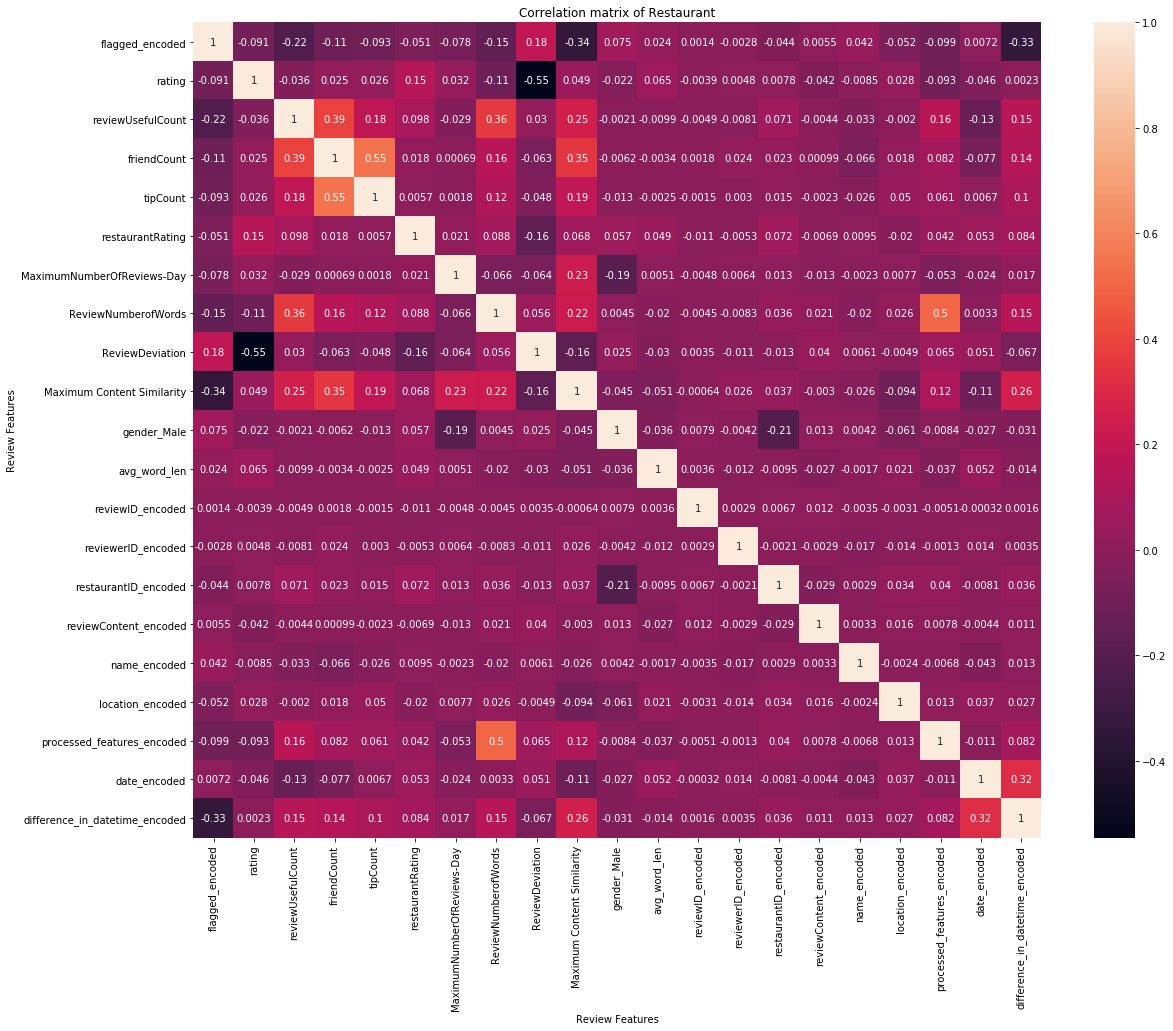

In [0]:
# A look at the revised correlation matrix, using the "Seaborn" package, for a more informative visual and analysis. We now have all correlations of < 0.6:-

import seaborn as sns

import matplotlib.pyplot as plt
f = plt.figure(figsize=(19, 15))
# taking all rows but only 26 columns
df_small = df.iloc[:,:]

correlation_mat = df_small.corr()

sns.heatmap(correlation_mat, annot = True)
plt.title("Correlation matrix of Restaurant")

plt.xlabel("Review Features")

plt.ylabel("Review Features")

plt.show()

In [0]:
# A quick look at the remaining features in our DataFrame:-

df.dtypes

Out[91]: flagged_encoded int64
rating int64
reviewUsefulCount int64
friendCount int64
tipCount int64
restaurantRating float64
MaximumNumberOfReviews-Day float64
ReviewNumberofWords int64
ReviewDeviation float64
Maximum Content Similarity float64
gender_Male uint8
avg_word_len float64
reviewID_encoded int64
reviewerID_encoded int64
restaurantID_encoded int64
reviewContent_encoded int64
name_encoded int64
location_encoded int64
processed_features_encoded int64
date_encoded int64
difference_in_datetime_encoded int64
dtype: object

In [0]:
# Screenshot of the first few rows in the DataFrame:-

df.head()

Out[92]:

,flagged_encoded,rating,reviewUsefulCount,friendCount,tipCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,gender_Male,avg_word_len,reviewID_encoded,reviewerID_encoded,restaurantID_encoded,reviewContent_encoded,name_encoded,location_encoded,processed_features_encoded,date_encoded,difference_in_datetime_encoded
17290,0,5,0,15,0,4.0,0.083333,122,0.250,0.000000,1,5.073770,1268,12852,75,12389,674,245,9679,2297,1296
11992,0,4,0,0,1,4.0,0.083333,33,0.000,0.032193,0,5.878788,9590,2485,0,16875,5894,245,1874,1472,115
5697,0,4,0,20,8,4.0,0.166667,176,0.000,0.132616,0,5.187500,20539,7541,23,6578,10853,245,19541,1910,916
371,0,5,3,150,18,4.5,0.083333,564,0.125,0.145491,0,5.140071,16151,12387,98,5840,9503,1069,21971,1425,1162
9748,0,1,4,3,0,4.0,0.166667,23,0.750,0.025462,0,4.913043,4891,2056,106,19866,3549,245,17764,1954,954


In [0]:
# A quick look at the revised shape of the DataFrame:-

df.shape

Out[93]: (23520, 21)

In [0]:
# Examine the current class distribution for the "flagged_encoded" variable:-

pd.crosstab(index = df['flagged_encoded'], columns="Total count")

Out[94]:

col_0,Total count
flagged_encoded,
0,17823
1,5697


# I. Logistic Regression

In order to run our Logistic Regression Model, our first order of business was to perform an "80-20 Train-Test Split" on the data, in order to train the model on 80% of the data, and then test it on the balance 20% of the data, to check how well our model works.

In [0]:
# Loading all the necessary packages and libraies, such as "sklearn":-

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

In [0]:
# Replace infinity values:-

df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [0]:
# Drop all empty cells:-

df.dropna(inplace=True)

In [0]:
# Train-test split (80-20 Split):-

xcols = df.columns[1 : len(df.columns)].to_list()
print(xcols,'\n')

X_train, X_test, y_train, y_test = train_test_split(df[xcols], df['flagged_encoded'], 
                                                    train_size=0.8, random_state=1)
print('training data:', X_train.shape)
print('test data:', X_test.shape)

['rating', 'reviewUsefulCount', 'friendCount', 'tipCount', 'restaurantRating', 'MaximumNumberOfReviews-Day', 'ReviewNumberofWords', 'ReviewDeviation', 'Maximum Content Similarity', 'gender_Male', 'avg_word_len', 'reviewID_encoded', 'reviewerID_encoded', 'restaurantID_encoded', 'reviewContent_encoded', 'name_encoded', 'location_encoded', 'processed_features_encoded', 'date_encoded', 'difference_in_datetime_encoded'] 

training data: (18816, 20)
test data: (4704, 20)

For the Logistic Regression Analysis, we essentially developed 2 sub-models here:-                                                                                                                     1) Logistic Regression - Including ALL the Features                                                                                                                                                    2) Logistic Regression - Including only to TOP 5 largest Positive and Negative features

In [0]:
# Importing and Loading all the necessary packages:-

# data packages
import pandas as pd
import numpy as np

# algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# organizing tests
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# some metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

#1) LR Model 1 - Logistic Regression - Including ALL the Features

We first developed a Linear Regression model, using all the features in the DataFrame to make predictions if a particular review is Fake or True. The analysis is seen below.

In [0]:
# Defining/Performing, Fitting and checking the accuracy of the Logistic regression model, using ALL the features/columns:-

log_reg = LogisticRegression(solver='lbfgs', max_iter=1000000000)
clf_reg = log_reg.fit(X_train, y_train)
print('training accuracy: {}'.format(clf_reg.score(X_train, y_train).round(4)))
print('test accuracy: {}'.format(clf_reg.score(X_test, y_test).round(4)))

confusionmat = confusion_matrix(y_test,clf_reg.predict(X_test))
print("Confusion Matrix :\n", confusionmat)
    
classirep = classification_report(y_test,clf_reg.predict(X_test))
print("Classification Report :\n", classirep)
    
mcc = matthews_corrcoef(y_test, clf_reg.predict(X_test))
print("Mathew's Correlation Coeffiecient MCC :", mcc)
            
precisionrecall = precision_recall_fscore_support(y_test, clf_reg.predict(X_test), average=None)
print("Precision Recall Score:", precisionrecall)

print('Overall training accuracy: {}'.format(clf_reg.score(X_train, y_train).round(4)))
print('Overall test accuracy: {}'.format(clf_reg.score(X_test, y_test).round(4)))
print('other test stats:')
y_pred_test_01 = clf_reg.predict(X_test)
print('  Overall Recall: {:.3f}'.format(recall_score(y_test, y_pred_test_01, pos_label=1)))
print('  Overall Precision: {:.3f}'.format(precision_score(y_test, y_pred_test_01, pos_label=1)))
print('  Overall F1 score: {:.3f}'.format(f1_score(y_test, y_pred_test_01, pos_label=1)))
cm01 = confusion_matrix(y_test, y_pred_test_01)
tn, fp, fn, tp = cm01.ravel()
specificity = tn / (tn+fp)
print('  Overall Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm01)

training accuracy: 0.8331
test accuracy: 0.8425
Confusion Matrix :
 [[3256 292]
 [ 449 707]]
Classification Report :
 precision recall f1-score support

 0 0.88 0.92 0.90 3548
 1 0.71 0.61 0.66 1156

 accuracy 0.84 4704
 macro avg 0.79 0.76 0.78 4704
weighted avg 0.84 0.84 0.84 4704

Mathew's Correlation Coeffiecient MCC : 0.5571716940623467
Precision Recall Score: (array([0.87881242, 0.70770771]), array([0.91770011, 0.6115917 ]), array([0.89783538, 0.65614849]), array([3548, 1156]))
Overall training accuracy: 0.8331
Overall test accuracy: 0.8425
other test stats:
 Overall Recall: 0.612
 Overall Precision: 0.708
 Overall F1 score: 0.656
 Overall Specificity: 0.918
confusion matrix:
 [[3256 292]
 [ 449 707]]

The above results is the output of this first model. Essentially, it does quite well in terms of accuracy, precision, recall and f1-score. The confusion matrix also depicts a decent model in terms of identifying True Positives (TP) and True Negatives (TN).

In [0]:
# Screenshot of the DataFrame:-

df.head()

Out[102]:

,flagged_encoded,rating,reviewUsefulCount,friendCount,tipCount,restaurantRating,MaximumNumberOfReviews-Day,ReviewNumberofWords,ReviewDeviation,Maximum Content Similarity,gender_Male,avg_word_len,reviewID_encoded,reviewerID_encoded,restaurantID_encoded,reviewContent_encoded,name_encoded,location_encoded,processed_features_encoded,date_encoded,difference_in_datetime_encoded
17290,0,5,0,15,0,4.0,0.083333,122,0.250,0.000000,1,5.073770,1268,12852,75,12389,674,245,9679,2297,1296
11992,0,4,0,0,1,4.0,0.083333,33,0.000,0.032193,0,5.878788,9590,2485,0,16875,5894,245,1874,1472,115
5697,0,4,0,20,8,4.0,0.166667,176,0.000,0.132616,0,5.187500,20539,7541,23,6578,10853,245,19541,1910,916
371,0,5,3,150,18,4.5,0.083333,564,0.125,0.145491,0,5.140071,16151,12387,98,5840,9503,1069,21971,1425,1162
9748,0,1,4,3,0,4.0,0.166667,23,0.750,0.025462,0,4.913043,4891,2056,106,19866,3549,245,17764,1954,954


#2) LR Model 2 - Logistic Regression - Including only to TOP 5 largest Positive and Negative features

We have several feaures in our model, but Which are the Top 5 largest positive and negative features, a total of 10 features, which have the greatest influence on the "y" variable - "flagged_encoded"? This was our main focus for the next part of our analysis. Let's take a deeper look at this, and then analyze the coefficients associated with each of these top 5 largest positive and negative features.

In [0]:
# Put the coefficients into a new dataframe and identify the top 5 largest positive and negative features:-

coef = pd.concat([pd.DataFrame(xcols),pd.DataFrame(np.transpose(clf_reg.coef_))], axis = 1)
coef.columns = ['feature','coefficient']
coef.sort_values(by=['coefficient'], ascending=False, inplace=True)
# examine the features with the largest coefficients
print('Five largest positive features:\n', coef.head(5), '\n')
print('Five largest negative features:\n', coef.tail(5))

Five largest positive features:
 feature coefficient
9 gender_Male 0.318552
7 ReviewDeviation 0.288818
10 avg_word_len 0.178867
4 restaurantRating 0.146480
13 restaurantID_encoded 0.000577 

Five largest negative features:
 feature coefficient
2 friendCount -0.047899
3 tipCount -0.127238
8 Maximum Content Similarity -0.173227
0 rating -0.277294
1 reviewUsefulCount -1.806149

Below is a list of the Top 5 largest positive and negative features as identified above.

In [0]:
# Putting the top 5 largest positive and negative features into a list:-

xcols2 = coef.feature[0:5].to_list()
xcols2 += coef.feature[-5:].to_list()
print(xcols2)

['gender_Male', 'ReviewDeviation', 'avg_word_len', 'restaurantRating', 'restaurantID_encoded', 'friendCount', 'tipCount', 'Maximum Content Similarity', 'rating', 'reviewUsefulCount']

In [0]:
# Performing a revised train-test split (80-20 Split), using only the top 5 largest positive and negative features:-

X_train2, X_test2, y_train2, y_test2 = train_test_split(df[xcols2], df['flagged_encoded'], 
                                                    train_size=0.8, random_state=1)
print('training data:', X_train2.shape)
print('test data:', X_test2.shape)

training data: (18816, 10)
test data: (4704, 10)

We now develop a second regression model, using only this reduced feature list. We decide to do this to see if by focussing only on these top 5 largest positive and negative features, it will give our model a lift, to see if it improves the model in any way.

In [0]:
# Re-Running the Logistic Regression Model after reducing the feature set to the top 5 largest positive and negative features:-

log_reg_2 = LogisticRegression(solver='lbfgs', max_iter=1000000000)
clf_reg_2 = log_reg_2.fit(X_train2, y_train2)

print('training accuracy: {}'.format(clf_reg_2.score(X_train2, y_train2).round(4)))
print('test accuracy: {}'.format(clf_reg_2.score(X_test2, y_test2).round(4)))

confusionmat2 = confusion_matrix(y_test2,clf_reg_2.predict(X_test2))
print("Confusion Matrix :\n", confusionmat2)
    
classirep2 = classification_report(y_test2,clf_reg_2.predict(X_test2))
print("Classification Report :\n", classirep2)
    
mcc2 = matthews_corrcoef(y_test2, clf_reg_2.predict(X_test2))
print("Mathew's Correlation Coeffiecient MCC :", mcc2)
            
precisionrecall2 = precision_recall_fscore_support(y_test2, clf_reg_2.predict(X_test2), average=None)
print("Precision Recall Score:", precisionrecall2)

print('Overall training accuracy: {}'.format(clf_reg_2.score(X_train2, y_train2).round(4)))
print('Overall test accuracy: {}'.format(clf_reg_2.score(X_test2, y_test2).round(4)))
print('other test stats:')
y_pred_test_02 = clf_reg_2.predict(X_test2)
print('  Overall Recall: {:.3f}'.format(recall_score(y_test2, y_pred_test_02, pos_label=1)))
print('  Overall Precision: {:.3f}'.format(precision_score(y_test2, y_pred_test_02, pos_label=1)))
print('  Overall F1 score: {:.3f}'.format(f1_score(y_test2, y_pred_test_02, pos_label=1)))
cm02 = confusion_matrix(y_test2, y_pred_test_02)
tn, fp, fn, tp = cm02.ravel()
specificity = tn / (tn+fp)
print('  Overall Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm02)

training accuracy: 0.8304
test accuracy: 0.8416
Confusion Matrix :
 [[3252 296]
 [ 449 707]]
Classification Report :
 precision recall f1-score support

 0 0.88 0.92 0.90 3548
 1 0.70 0.61 0.65 1156

 accuracy 0.84 4704
 macro avg 0.79 0.76 0.78 4704
weighted avg 0.84 0.84 0.84 4704

Mathew's Correlation Coeffiecient MCC : 0.5551749330406412
Precision Recall Score: (array([0.87868144, 0.70488534]), array([0.91657272, 0.6115917 ]), array([0.8972272 , 0.65493284]), array([3548, 1156]))
Overall training accuracy: 0.8304
Overall test accuracy: 0.8416
other test stats:
 Overall Recall: 0.612
 Overall Precision: 0.705
 Overall F1 score: 0.655
 Overall Specificity: 0.917
confusion matrix:
 [[3252 296]
 [ 449 707]]

The above results is the output of this second model. Essentially, it also does quite well in terms of accuracy, precision, recall and f1-score. The confusion matrix also depicts a decent model in terms of identifying True Positives (TP) and True Negatives (TN).

Which Model performs better?
Both the models are very close in terms of their performance, but Model 1 - "Logistic Regression - Including ALL the Features" performs better between the 2, as it can identify the greatest number of True Positives (TP) and True Negatives (TN), and also does better when we look at the evaluation metrics, precision, recall, f1-score, as well as the overall accuracy, which are all higher for Model 1, when compared to Model 2.

But wait a minute, looking at the imbalanced nature of our data, i.e. there are many more "N - not-fake" reviews when compared to much fewer "Y - fake" reviews, wouldn't that affect the predictive power and believability of the model? The model may be able to predict the majority ("N - not-fake"), but what abot the minority ("Y - fake")? As seen earlier, 17,823 "N - not-fake" reviews and only 5,697 "Y - fake" reviews in our dataset. We will need to account for this. This is the focus of the next section of our analysis, to try and "Remedy the Imbalanced Classification".

#Remedying Imbalanced Classification

In [0]:
# Importing and Loading all the necessary packages:-

# data packages
import pandas as pd
import numpy as np

# algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# organizing tests
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# some metrics
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot as plt

As mentioned earlier, our data does seem to be imbalanced, given the nature, purpose and analyis we are performing. One would expect there to be much less "Fake" reviews, when compared to "Not-Fake" reviews. Please see below.

In [0]:
# Examine the current class distribution:-

pd.crosstab(index = df['flagged_encoded'], columns="Total count")

Out[108]:

col_0,Total count
flagged_encoded,
0,17823
1,5697


We will need to correct for this imbalance, to see if our model improves.

We will use a method called the "Modify Algorithm Approach" to remedy this imbalance, which uses a "Balanced" class weight attribute. Once again, we will use this method, and build 2 sub-models:-      1) Using ALL the Features/X columns                                                                                                                                                                      2) Using ONLY the TOP 5 largest positive and negative features, as the X columns.

Modify Algorithm Approach -

#3) LR Model 3 Balanced - Logistic Regression - Using ALL the Features/X columns

In [0]:
"""Remedying Class Imbalance using ALL the X columns."""

In [0]:
# Modify the algorithm's objective with a class_weight attribute, using ALL the X columns:-

log_reg_mod1 = LogisticRegression(solver='lbfgs', max_iter=1000000000, class_weight='balanced')
clf_reg_mod1 = log_reg_mod1.fit(X_train, y_train)
print('training accuracy: {}'.format(clf_reg_mod1.score(X_train, y_train).round(4)))
print('test accuracy: {}'.format(clf_reg_mod1.score(X_test, y_test).round(4)))
print('other test stats:')
y_pred_test_1 = clf_reg_mod1.predict(X_test)
print('  Recall: {:.3f}'.format(recall_score(y_test, y_pred_test_1, pos_label=1)))
print('  Precision: {:.3f}'.format(precision_score(y_test, y_pred_test_1, pos_label=1)))
print('  F1 score: {:.3f}'.format(f1_score(y_test, y_pred_test_1, pos_label=1)))
cm = confusion_matrix(y_test, y_pred_test_1)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn+fp)
print('  Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm)

training accuracy: 0.7746
test accuracy: 0.7683
other test stats:
 Recall: 0.920
 Precision: 0.516
 F1 score: 0.661
 Specificity: 0.719
confusion matrix:
 [[2551 997]
 [ 93 1063]]

In [0]:
# Creating and inputing the X and y columns into two separate DataFrames:-

X1, y1 = df[xcols], df['flagged_encoded']

In [0]:
# How well does it do on the original dataset?:-

y_pred_1 = clf_reg_mod1.predict(X1)
print('Accuracy: {:.3f}'.format(clf_reg_mod1.score(X1, y1)))
print('Recall: {:.3f}'.format(recall_score(y1, y_pred_1, pos_label=1)))
print('Precision: {:.3f}'.format(precision_score(y1, y_pred_1, pos_label=1)))
print('F1 score: {:.3f}'.format(f1_score(y1, y_pred_1, pos_label=1)))
cm1 = confusion_matrix(y1, y_pred_1)
tn, fp, fn, tp = cm1.ravel()
specificity = tn / (tn+fp)
print('Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm1)

Accuracy: 0.773
Recall: 0.913
Precision: 0.518
F1 score: 0.661
Specificity: 0.729
confusion matrix:
 [[12987 4836]
 [ 495 5202]]

This model does quite well, especially when you compare all the evaluation metrics across the 3 models till now.

#4) LR Model 4 Balanced - Using ONLY the TOP 5 largest positive and negative features, as the X columns

In [0]:
"""Remedying Class Imbalance using ONLY the top 5 largest positive and negative features, as the X columns."""

In [0]:
# Modify the algorithm's objective with a class_weight attribute, using ONLY the top 5 largest positive and negative features, as the X columns:-

log_reg_mod1_A = LogisticRegression(solver='lbfgs', max_iter=1000000000, class_weight='balanced')
clf_reg_mod1_A = log_reg_mod1_A.fit(X_train2, y_train2)
print('training accuracy: {}'.format(clf_reg_mod1_A.score(X_train2, y_train2).round(4)))
print('test accuracy: {}'.format(clf_reg_mod1_A.score(X_test2, y_test2).round(4)))
print('other test stats:')
y_pred_test_1_A = clf_reg_mod1_A.predict(X_test2)
print('  Recall: {:.3f}'.format(recall_score(y_test2, y_pred_test_1_A, pos_label=1)))
print('  Precision: {:.3f}'.format(precision_score(y_test2, y_pred_test_1_A, pos_label=1)))
print('  F1 score: {:.3f}'.format(f1_score(y_test2, y_pred_test_1_A, pos_label=1)))
cm2 = confusion_matrix(y_test2, y_pred_test_1_A)
tn, fp, fn, tp = cm2.ravel()
specificity = tn / (tn+fp)
print('  Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm2)

training accuracy: 0.7536
test accuracy: 0.7551
other test stats:
 Recall: 0.934
 Precision: 0.501
 F1 score: 0.652
 Specificity: 0.697
confusion matrix:
 [[2472 1076]
 [ 76 1080]]

In [0]:
# Creating and inputing the X and y columns into two separate DataFrames:-

X1_A, y1_A = df[xcols2], df['flagged_encoded']

In [0]:
# How well does it do on the original dataset?:-

y_pred_1_A = clf_reg_mod1_A.predict(X1_A)
print('Accuracy: {:.3f}'.format(clf_reg_mod1_A.score(X1_A, y1_A)))
print('Recall: {:.3f}'.format(recall_score(y1_A, y_pred_1_A, pos_label=1)))
print('Precision: {:.3f}'.format(precision_score(y1_A, y_pred_1_A, pos_label=1)))
print('F1 score: {:.3f}'.format(f1_score(y1_A, y_pred_1_A, pos_label=1)))
cm3 = confusion_matrix(y1_A, y_pred_1_A)
tn, fp, fn, tp = cm3.ravel()
specificity = tn / (tn+fp)
print('Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm3)

Accuracy: 0.754
Recall: 0.929
Precision: 0.496
F1 score: 0.647
Specificity: 0.698
confusion matrix:
 [[12437 5386]
 [ 403 5294]]

Once again, this model does quite well, especially when you compare all the evaluation metrics across the 4 models till now.

We will perform a model comparison at the end of all our models and analysis. Let us now look at the ROC Curve to evaluate it better.

ROC Curve

In [0]:
"""On the Original data using ALL the features"""

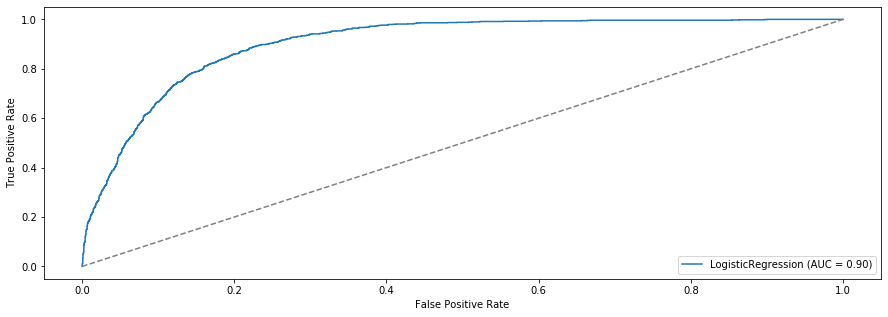

In [0]:
# Simple ROC curve:-

log_reg_Ev = LogisticRegression(solver='lbfgs', max_iter=1000000000)
clf_reg_Ev = log_reg_Ev.fit(X_train, y_train)

plot_roc_curve(clf_reg_Ev, X_test, y_test)
x_1 = np.linspace(0, 1.0)
plt.plot(x_1, x_1, color='grey', ls='--')
plt.show()

End of Logistic Regression model

# II. Decision Tree

#1) DT Model 1 - Using ALL the Features/X columns

In [0]:
# Importing the libraries and packages and building a Decision Tree model using ALL the Features/X columns:-

from sklearn.tree import DecisionTreeClassifier
model3= DecisionTreeClassifier(criterion="gini")

In [0]:
# Train the model:-

model3.fit(X_train, y_train)

Out[117]: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
 max_depth=None, max_features=None, max_leaf_nodes=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, presort='deprecated',
 random_state=None, splitter='best')

In [0]:
# Run the model and get the metrics:-

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('training accuracy: {}'.format(model3.score(X_train, y_train).round(4)))
print('test accuracy: {}'.format(model3.score(X_test, y_test).round(4)))

confusionmat4 = confusion_matrix(y_test,model3.predict(X_test))
print("Confusion Matrix :\n", confusionmat4)
    
classirep4 = classification_report(y_test,model3.predict(X_test))
print("Classification Report :\n", classirep4)
    
mcc4 = matthews_corrcoef(y_test, model3.predict(X_test))
print("Mathew's Correlation Coeffiecient MCC :", mcc4)
            
precisionrecall4 = precision_recall_fscore_support(y_test, model3.predict(X_test), average=None)
print("Precision Recall Score:", precisionrecall4)

print('Overall training accuracy: {}'.format(model3.fit(X_train, y_train).score(X_train, y_train).round(4)))
print('Overall test accuracy: {}'.format(model3.fit(X_train, y_train).score(X_test, y_test).round(4)))
print('other test stats:')
y_pred_test_03 = model3.fit(X_train, y_train).predict(X_test)
print('  Overall Recall: {:.3f}'.format(recall_score(y_test, y_pred_test_03, pos_label=1)))
print('  Overall Precision: {:.3f}'.format(precision_score(y_test, y_pred_test_03, pos_label=1)))
print('  Overall F1 score: {:.3f}'.format(f1_score(y_test, y_pred_test_03, pos_label=1)))
cm03 = confusion_matrix(y_test, y_pred_test_03)
tn, fp, fn, tp = cm03.ravel()
specificity = tn / (tn+fp)
print('  Overall Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm03)

training accuracy: 1.0
test accuracy: 0.8335
Confusion Matrix :
 [[3151 397]
 [ 386 770]]
Classification Report :
 precision recall f1-score support

 0 0.89 0.89 0.89 3548
 1 0.66 0.67 0.66 1156

 accuracy 0.83 4704
 macro avg 0.78 0.78 0.78 4704
weighted avg 0.83 0.83 0.83 4704

Mathew's Correlation Coeffiecient MCC : 0.5524348971220732
Precision Recall Score: (array([0.89086797, 0.65981148]), array([0.88810598, 0.66608997]), array([0.88948483, 0.66293586]), array([3548, 1156]))
Overall training accuracy: 1.0
Overall test accuracy: 0.8293
other test stats:
 Overall Recall: 0.666
 Overall Precision: 0.652
 Overall F1 score: 0.659
 Overall Specificity: 0.884
confusion matrix:
 [[3137 411]
 [ 386 770]]

#2) DT Model 2 - Using Top 5 largest positive and negative features

In [0]:
## Re-running the Decision Tree model using ONLY the top 5 largest positive and negative features, as the X columns:-

from sklearn.tree import DecisionTreeClassifier
model4= DecisionTreeClassifier(criterion="gini")

In [0]:
# Train the model:-

model4.fit(X_train2, y_train2)

Out[120]: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
 max_depth=None, max_features=None, max_leaf_nodes=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, presort='deprecated',
 random_state=None, splitter='best')

In [0]:
# Run the model and get the metrics:-

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('training accuracy: {}'.format(model4.score(X_train2, y_train2).round(4)))
print('test accuracy: {}'.format(model4.score(X_test2, y_test2).round(4)))

confusionmat5 = confusion_matrix(y_test2,model4.predict(X_test2))
print("Confusion Matrix :\n", confusionmat5)
    
classirep5 = classification_report(y_test2,model4.predict(X_test2))
print("Classification Report :\n", classirep5)
    
mcc5 = matthews_corrcoef(y_test2, model4.predict(X_test2))
print("Mathew's Correlation Coeffiecient MCC :", mcc5)
            
precisionrecall5 = precision_recall_fscore_support(y_test2, model4.predict(X_test2), average=None)
print("Precision Recall Score:", precisionrecall5)

print('Overall training accuracy: {}'.format(model4.fit(X_train2, y_train2).score(X_train2, y_train2).round(4)))
print('Overall test accuracy: {}'.format(model4.fit(X_train2, y_train2).score(X_test2, y_test2).round(4)))
print('other test stats:')
y_pred_test_04 = model4.fit(X_train2, y_train2).fit(X_train2, y_train2).predict(X_test2)
print('  Overall Recall: {:.3f}'.format(recall_score(y_test2, y_pred_test_04, pos_label=1)))
print('  Overall Precision: {:.3f}'.format(precision_score(y_test2, y_pred_test_04, pos_label=1)))
print('  Overall F1 score: {:.3f}'.format(f1_score(y_test2, y_pred_test_04, pos_label=1)))
cm04 = confusion_matrix(y_test2, y_pred_test_04)
tn, fp, fn, tp = cm04.ravel()
specificity = tn / (tn+fp)
print('  Overall Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm04)

training accuracy: 0.9991
test accuracy: 0.8569
Confusion Matrix :
 [[3235 313]
 [ 360 796]]
Classification Report :
 precision recall f1-score support

 0 0.90 0.91 0.91 3548
 1 0.72 0.69 0.70 1156

 accuracy 0.86 4704
 macro avg 0.81 0.80 0.80 4704
weighted avg 0.86 0.86 0.86 4704

Mathew's Correlation Coeffiecient MCC : 0.6089324693380908
Precision Recall Score: (array([0.89986092, 0.71776375]), array([0.91178129, 0.68858131]), array([0.90578188, 0.70286976]), array([3548, 1156]))
Overall training accuracy: 0.9991
Overall test accuracy: 0.8614
other test stats:
 Overall Recall: 0.689
 Overall Precision: 0.716
 Overall F1 score: 0.702
 Overall Specificity: 0.911
confusion matrix:
 [[3233 315]
 [ 360 796]]

Modify Algorithm Approach -

#3) DT Model 3 Balanced - Using ALL the Features/X columns

In [0]:
"""Remedying Class Imbalance using ALL the X columns."""

In [0]:
# Modify the algorithm's objective with a class_weight attribute, using ALL the X columns:-

model5= DecisionTreeClassifier(criterion="gini", class_weight='balanced')
clf_dt_mod5 = model5.fit(X_train, y_train)
print('training accuracy: {}'.format(clf_dt_mod5.score(X_train, y_train).round(4)))
print('test accuracy: {}'.format(clf_dt_mod5.score(X_test, y_test).round(4)))
print('other test stats:')
y_pred_test_5 = clf_dt_mod5.predict(X_test)
print('  Recall: {:.3f}'.format(recall_score(y_test, y_pred_test_5, pos_label=1)))
print('  Precision: {:.3f}'.format(precision_score(y_test, y_pred_test_5, pos_label=1)))
print('  F1 score: {:.3f}'.format(f1_score(y_test, y_pred_test_5, pos_label=1)))
cm5 = confusion_matrix(y_test, y_pred_test_5)
tn, fp, fn, tp = cm5.ravel()
specificity = tn / (tn+fp)
print('  Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm5)

training accuracy: 1.0
test accuracy: 0.8321
other test stats:
 Recall: 0.657
 Precision: 0.659
 F1 score: 0.658
 Specificity: 0.889
confusion matrix:
 [[3154 394]
 [ 396 760]]

In [0]:
# Creating and inputing the X and y columns into two separate DataFrames:-

X5, y5 = df[xcols], df['flagged_encoded']

In [0]:
# How well does it do on the original dataset?:-

y_pred_5 = clf_dt_mod5.predict(X5)
print('Accuracy: {:.3f}'.format(clf_dt_mod5.score(X5, y5)))
print('Recall: {:.3f}'.format(recall_score(y5, y_pred_5, pos_label=1)))
print('Precision: {:.3f}'.format(precision_score(y5, y_pred_5, pos_label=1)))
print('F1 score: {:.3f}'.format(f1_score(y5, y_pred_5, pos_label=1)))
cm6 = confusion_matrix(y5, y_pred_5)
tn, fp, fn, tp = cm6.ravel()
specificity = tn / (tn+fp)
print('Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm6)

Accuracy: 0.966
Recall: 0.930
Precision: 0.931
F1 score: 0.931
Specificity: 0.978
confusion matrix:
 [[17429 394]
 [ 396 5301]]

#4) DT Model 4 Balanced - Using ONLY the TOP 5 largest positive and negative features, as the X columns

In [0]:
"""Remedying Class Imbalance using ONLY the top 5 largest positive and negative features, as the X columns."""

In [0]:
# Modify the algorithm's objective with a class_weight attribute, using ONLY the top 5 largest positive and negative features, as the X columns:-

model6= DecisionTreeClassifier(criterion="gini", class_weight='balanced')
clf_dt_mod6 = model6.fit(X_train2, y_train2)
print('training accuracy: {}'.format(clf_dt_mod6.score(X_train2, y_train2).round(4)))
print('test accuracy: {}'.format(clf_dt_mod6.score(X_test2, y_test2).round(4)))
print('other test stats:')
y_pred_test_6 = clf_dt_mod6.predict(X_test2)
print('  Recall: {:.3f}'.format(recall_score(y_test2, y_pred_test_6, pos_label=1)))
print('  Precision: {:.3f}'.format(precision_score(y_test2, y_pred_test_6, pos_label=1)))
print('  F1 score: {:.3f}'.format(f1_score(y_test2, y_pred_test_6, pos_label=1)))
cm7 = confusion_matrix(y_test2, y_pred_test_6)
tn, fp, fn, tp = cm7.ravel()
specificity = tn / (tn+fp)
print('  Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm7)

training accuracy: 0.999
test accuracy: 0.8601
other test stats:
 Recall: 0.675
 Precision: 0.734
 F1 score: 0.703
 Specificity: 0.921
confusion matrix:
 [[3266 282]
 [ 376 780]]

In [0]:
# Creating and inputing the X and y columns into two separate DataFrames:-

X6, y6 = df[xcols2], df['flagged_encoded']

In [0]:
# How well does it do on the original dataset?:-

y_pred_6 = clf_dt_mod6.predict(X6)
print('Accuracy: {:.3f}'.format(clf_dt_mod6.score(X6, y6)))
print('Recall: {:.3f}'.format(recall_score(y6, y_pred_6, pos_label=1)))
print('Precision: {:.3f}'.format(precision_score(y6, y_pred_6, pos_label=1)))
print('F1 score: {:.3f}'.format(f1_score(y6, y_pred_6, pos_label=1)))
cm8 = confusion_matrix(y6, y_pred_6)
tn, fp, fn, tp = cm8.ravel()
specificity = tn / (tn+fp)
print('Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm8)

Accuracy: 0.971
Recall: 0.934
Precision: 0.947
F1 score: 0.940
Specificity: 0.983
confusion matrix:
 [[17523 300]
 [ 376 5321]]

ROC Curve

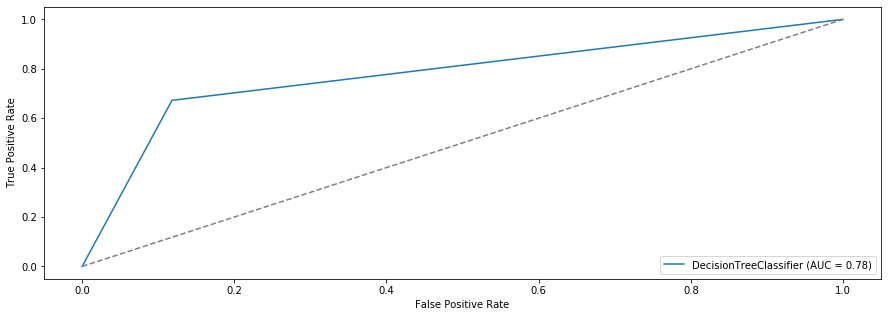

In [0]:
# Simple ROC curve:-

model_ROC= DecisionTreeClassifier(criterion="gini")
clf_dt_mod_ROC = model_ROC.fit(X_train, y_train)

plot_roc_curve(clf_dt_mod_ROC, X_test, y_test)
x_2 = np.linspace(0, 1.0)
plt.plot(x_2, x_2, color='grey', ls='--')
plt.show()

End of the Decision Tree model

# III. Random Forest

#1) RF Model 1 - Using ALL the Features/X columns

In [0]:
# Importing the libraries and packages and train the model, using ALL the Features/X columns:-

from sklearn.ensemble import RandomForestClassifier

model_ran = RandomForestClassifier(n_estimators=200, random_state=0)
model_ran.fit(X_train, y_train)

Out[129]: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
 criterion='gini', max_depth=None, max_features='auto',
 max_leaf_nodes=None, max_samples=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, n_estimators=200,
 n_jobs=None, oob_score=False, random_state=0, verbose=0,
 warm_start=False)

In [0]:
# Run the model and get the metrics:-

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('training accuracy: {}'.format(model_ran.score(X_train, y_train).round(4)))
print('test accuracy: {}'.format(model_ran.score(X_test, y_test).round(4)))

confusionmat_ran = confusion_matrix(y_test,model_ran.predict(X_test))
print("Confusion Matrix :\n", confusionmat_ran)
    
classirep_ran = classification_report(y_test,model_ran.predict(X_test))
print("Classification Report :\n", classirep_ran)
    
mcc_ran = matthews_corrcoef(y_test2, model_ran.predict(X_test))
print("Mathew's Correlation Coeffiecient MCC :", mcc_ran)
            
precisionrecall_ran = precision_recall_fscore_support(y_test, model_ran.predict(X_test), average=None)
print("Precision Recall Score:", precisionrecall_ran)

print('Overall training accuracy: {}'.format(model_ran.fit(X_train, y_train).score(X_train, y_train).round(4)))
print('Overall test accuracy: {}'.format(model_ran.fit(X_train, y_train).score(X_test, y_test).round(4)))
print('other test stats:')
y_pred_test_05 = model_ran.fit(X_train, y_train).fit(X_train, y_train).predict(X_test)
print('  Overall Recall: {:.3f}'.format(recall_score(y_test, y_pred_test_05, pos_label=1)))
print('  Overall Precision: {:.3f}'.format(precision_score(y_test, y_pred_test_05, pos_label=1)))
print('  Overall F1 score: {:.3f}'.format(f1_score(y_test, y_pred_test_05, pos_label=1)))
cm05 = confusion_matrix(y_test, y_pred_test_05)
tn, fp, fn, tp = cm05.ravel()
specificity = tn / (tn+fp)
print('  Overall Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm05)

training accuracy: 1.0
test accuracy: 0.8763
Confusion Matrix :
 [[3286 262]
 [ 320 836]]
Classification Report :
 precision recall f1-score support

 0 0.91 0.93 0.92 3548
 1 0.76 0.72 0.74 1156

 accuracy 0.88 4704
 macro avg 0.84 0.82 0.83 4704
weighted avg 0.87 0.88 0.88 4704

Mathew's Correlation Coeffiecient MCC : 0.660888447315109
Precision Recall Score: (array([0.91125901, 0.76138434]), array([0.92615558, 0.72318339]), array([0.91864691, 0.74179237]), array([3548, 1156]))
Overall training accuracy: 1.0
Overall test accuracy: 0.8763
other test stats:
 Overall Recall: 0.723
 Overall Precision: 0.761
 Overall F1 score: 0.742
 Overall Specificity: 0.926
confusion matrix:
 [[3286 262]
 [ 320 836]]

#2) RF Model 2 - Using Top 5 largest positive and negative features

In [0]:
## Re-running and training the Random Forest model using ONLY the top 5 largest positive and negative features, as the X columns:-

from sklearn.ensemble import RandomForestClassifier

model_ran2 = RandomForestClassifier(n_estimators=200, random_state=0)
model_ran2.fit(X_train2, y_train2)

Out[132]: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
 criterion='gini', max_depth=None, max_features='auto',
 max_leaf_nodes=None, max_samples=None,
 min_impurity_decrease=0.0, min_impurity_split=None,
 min_samples_leaf=1, min_samples_split=2,
 min_weight_fraction_leaf=0.0, n_estimators=200,
 n_jobs=None, oob_score=False, random_state=0, verbose=0,
 warm_start=False)

In [0]:
# Run the model and get the metrics:-

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print('training accuracy: {}'.format(model_ran2.score(X_train2, y_train2).round(4)))
print('test accuracy: {}'.format(model_ran2.score(X_test2, y_test2).round(4)))

confusionmat_ran2 = confusion_matrix(y_test2,model_ran2.predict(X_test2))
print("Confusion Matrix :\n", confusionmat_ran2)
    
classirep_ran2 = classification_report(y_test2,model_ran2.predict(X_test2))
print("Classification Report :\n", classirep_ran2)
    
mcc_ran2 = matthews_corrcoef(y_test2, model_ran2.predict(X_test2))
print("Mathew's Correlation Coeffiecient MCC :", mcc_ran2)
            
precisionrecall_ran2 = precision_recall_fscore_support(y_test2, model_ran2.predict(X_test2), average=None)
print("Precision Recall Score:", precisionrecall_ran2)

print('Overall training accuracy: {}'.format(model_ran2.fit(X_train2, y_train2).score(X_train2, y_train2).round(4)))
print('Overall test accuracy: {}'.format(model_ran2.fit(X_train2, y_train2).score(X_test2, y_test2).round(4)))
print('other test stats:')
y_pred_test_06 = model_ran2.fit(X_train2, y_train2).fit(X_train2, y_train2).predict(X_test2)
print('  Overall Recall: {:.3f}'.format(recall_score(y_test2, y_pred_test_06, pos_label=1)))
print('  Overall Precision: {:.3f}'.format(precision_score(y_test2, y_pred_test_06, pos_label=1)))
print('  Overall F1 score: {:.3f}'.format(f1_score(y_test2, y_pred_test_06, pos_label=1)))
cm06 = confusion_matrix(y_test2, y_pred_test_06)
tn, fp, fn, tp = cm06.ravel()
specificity = tn / (tn+fp)
print('  Overall Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm06)

training accuracy: 0.9991
test accuracy: 0.8788
Confusion Matrix :
 [[3340 208]
 [ 362 794]]
Classification Report :
 precision recall f1-score support

 0 0.90 0.94 0.92 3548
 1 0.79 0.69 0.74 1156

 accuracy 0.88 4704
 macro avg 0.85 0.81 0.83 4704
weighted avg 0.88 0.88 0.88 4704

Mathew's Correlation Coeffiecient MCC : 0.6605945694090982
Precision Recall Score: (array([0.90221502, 0.79241517]), array([0.94137542, 0.68685121]), array([0.92137931, 0.73586654]), array([3548, 1156]))
Overall training accuracy: 0.9991
Overall test accuracy: 0.8788
other test stats:
 Overall Recall: 0.687
 Overall Precision: 0.792
 Overall F1 score: 0.736
 Overall Specificity: 0.941
confusion matrix:
 [[3340 208]
 [ 362 794]]

Modify Algorithm Approach -

#3) RF Model 3 Balanced - Using ALL the Features/X columns

In [0]:
"""Remedying Class Imbalance using ALL the X columns."""

In [0]:
# Modify the algorithm's objective with a class_weight attribute, using ALL the X columns/features:-

model_ran_6 = RandomForestClassifier(n_estimators=200, random_state=0, class_weight='balanced')
clf_rf_mod6 = model_ran_6.fit(X_train, y_train)
print('training accuracy: {}'.format(clf_rf_mod6.score(X_train, y_train).round(4)))
print('test accuracy: {}'.format(clf_rf_mod6.score(X_test, y_test).round(4)))
print('other test stats:')
y_pred_test_rf_6 = clf_rf_mod6.predict(X_test)
print('  Recall: {:.3f}'.format(recall_score(y_test, y_pred_test_rf_6, pos_label=1)))
print('  Precision: {:.3f}'.format(precision_score(y_test, y_pred_test_rf_6, pos_label=1)))
print('  F1 score: {:.3f}'.format(f1_score(y_test, y_pred_test_rf_6, pos_label=1)))
cm9 = confusion_matrix(y_test, y_pred_test_rf_6)
tn, fp, fn, tp = cm9.ravel()
specificity = tn / (tn+fp)
print('  Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm9)

training accuracy: 1.0
test accuracy: 0.8761
other test stats:
 Recall: 0.708
 Precision: 0.770
 F1 score: 0.737
 Specificity: 0.931
confusion matrix:
 [[3303 245]
 [ 338 818]]

In [0]:
# Creating and inputing the X and y columns into two separate DataFrames:-

X9, y9 = df[xcols], df['flagged_encoded']

In [0]:
# How well does it do on the original dataset?:-

y_pred_rf_6 = clf_rf_mod6.predict(X9)
print('Accuracy: {:.3f}'.format(clf_rf_mod6.score(X9, y9)))
print('Recall: {:.3f}'.format(recall_score(y9, y_pred_rf_6, pos_label=1)))
print('Precision: {:.3f}'.format(precision_score(y9, y_pred_rf_6, pos_label=1)))
print('F1 score: {:.3f}'.format(f1_score(y9, y_pred_rf_6, pos_label=1)))
cm10 = confusion_matrix(y9, y_pred_rf_6)
tn, fp, fn, tp = cm10.ravel()
specificity = tn / (tn+fp)
print('Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm10)

Accuracy: 0.975
Recall: 0.941
Precision: 0.956
F1 score: 0.948
Specificity: 0.986
confusion matrix:
 [[17578 245]
 [ 338 5359]]

#4) RF Model 4 Balanced - Using ONLY the TOP 5 largest positive and negative features, as the X columns

In [0]:
"""Remedying Class Imbalance using ONLY the top 5 largest positive and negative features, as the X columns."""

In [0]:
# Modify the algorithm's objective with a class_weight attribute, using ONLY the top 5 largest positive and negative features, as the X columns:-

model_ran_7 = RandomForestClassifier(n_estimators=200, random_state=0, class_weight='balanced')
clf_rf_mod7 = model_ran_7.fit(X_train2, y_train2)
print('training accuracy: {}'.format(clf_rf_mod7.score(X_train2, y_train2).round(4)))
print('test accuracy: {}'.format(clf_rf_mod7.score(X_test2, y_test2).round(4)))
print('other test stats:')
y_pred_test_rf_7 = clf_rf_mod7.predict(X_test2)
print('  Recall: {:.3f}'.format(recall_score(y_test2, y_pred_test_rf_7, pos_label=1)))
print('  Precision: {:.3f}'.format(precision_score(y_test2, y_pred_test_rf_7, pos_label=1)))
print('  F1 score: {:.3f}'.format(f1_score(y_test2, y_pred_test_rf_7, pos_label=1)))
cm11 = confusion_matrix(y_test2, y_pred_test_rf_7)
tn, fp, fn, tp = cm11.ravel()
specificity = tn / (tn+fp)
print('  Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm11)

training accuracy: 0.9991
test accuracy: 0.8776
other test stats:
 Recall: 0.675
 Precision: 0.796
 F1 score: 0.730
 Specificity: 0.944
confusion matrix:
 [[3348 200]
 [ 376 780]]

In [0]:
# Creating and inputing the X and y columns into two separate DataFrames:-

X10, y10 = df[xcols2], df['flagged_encoded']

In [0]:
# How well does it do on the original dataset?:-

y_pred_rf_7 = clf_rf_mod7.predict(X10)
print('Accuracy: {:.3f}'.format(clf_rf_mod7.score(X10, y10)))
print('Recall: {:.3f}'.format(recall_score(y10, y_pred_rf_7, pos_label=1)))
print('Precision: {:.3f}'.format(precision_score(y10, y_pred_rf_7, pos_label=1)))
print('F1 score: {:.3f}'.format(f1_score(y10, y_pred_rf_7, pos_label=1)))
cm11 = confusion_matrix(y10, y_pred_rf_7)
tn, fp, fn, tp = cm11.ravel()
specificity = tn / (tn+fp)
print('Specificity: {:.3f}'.format(specificity))
print('confusion matrix:\n', cm11)

Accuracy: 0.975
Recall: 0.934
Precision: 0.961
F1 score: 0.947
Specificity: 0.988
confusion matrix:
 [[17609 214]
 [ 378 5319]]

ROC Curve

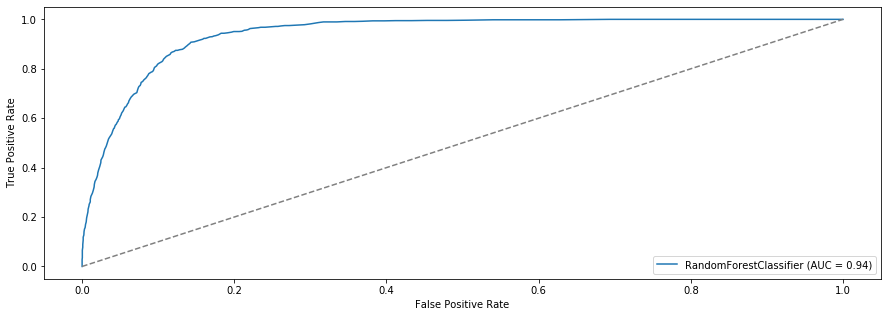

In [0]:
# Simple ROC curve:-

model_rf_ROC = RandomForestClassifier(n_estimators=200, random_state=0)
clf_rf_mod_ROC = model_rf_ROC.fit(X_train, y_train)

plot_roc_curve(clf_rf_mod_ROC, X_test, y_test)
x_3 = np.linspace(0, 1.0)
plt.plot(x_3, x_3, color='grey', ls='--')
plt.show()

End of the Random Forest model

#Model Selection

To Summarize, we essentially built and ran 3 Primary Models - 1) Linear Regression, 2) Decision Tree, and 3) Random Forest.
For each of these 3 models, we built 4 sub-models each, a total of 12 sub-models:-
1) Model built on an Unbalanced Dataset, and using ALL features/columns as the X variables.
2) Model built on an Unbalanced Dataset, and using ONLY to TOP 5 largest positive and negative features as the X columns.
3) Model built on a Balanced Dataset, and using ALL features/columns as the X variables.
4) Model built on a Balanced Dataset, and using ONLY to TOP 5 largest positive and negative features as the X columns.

Which is our model of choice?:-
After evaluating all the 12 sub-models, we decided to recommend using either of the 2 Random Forest Model's built on a Balanced Dataset. Essentially we recommend using either:-
1) "Random Forest (RF) Model 3 Balanced - Using ALL the Features/X columns" - Model built on a Balanced Dataset, and using ALL features/columns as the X variables
OR
2) "Random Forest (RF) Model 4 Balanced - Using ONLY the TOP 5 largest positive and negative features, as the X columns" - Model built on a Balanced Dataset, and using ONLY to TOP 5 largest positive and negative features as the X columns.

We decided that we could choose either one, as they are essentially very close in terms of all the evaluation matrices, such as Recall, Precision, F1 Score, Specificity, and Accuracy. One performs slightly better in certain metrics, while the other performs slightly better on the other metrics. Due to the imbalanced nature of the data, these 2 models correct/accomodate for such imbalances, and thus outperform the regular Unbalanced Models across all the primary Models used, Logistic Regression, Decison Tree and Random Forest. Due to the imbalanced nature of the data, we do not rely on the "Accuracy" values across all 12 models. We essentially use the remaining evaluation metrics to choose our models.

With the data we have, it had to be corrected for imbalance, in order to develop more robust and trustworty models. Running the 2 selected models on multiple itterations of the datasets at Yelp, would enable them to identify the 1 of the 2 selected models that works best for them, on average. The key features identified in spotting "Fake Reviews" are target variables/features for Yelp to look at to quickly spot possible fake reviews. By using these machine learning models, the company can automate this process even further, and thus comb through Big Data, which will enable them to significantly reduce possible fake reviews, and maybe even eliminate them in the long-run, thus ensuring they stay relevant among their customers and clients.

#Conclusion

These models can be used for:-
1) Determining fake vs real reviews
2) Help achieve better results & take corrective actions
3) Can be used for similar business problems
4) Build brand loyalty.

Using these models, Yelp can run several of their datasets through them, and identify possible fake reviews.

Through the power of Text Mining, we have essentially been able to build effective machine learning models which have application across several types of companies that have an online presence, and who use a review system. The model would only be needed to be tweaked to the specific company, based on the features in their dataset.

End of Project - Thank you for Reading!

# Appendix - Additional Models We Tried

We tried 2 other models, the "XG Boost Model" and the "SVM" models, but did not include them in our main report above, since they were taking too long to run. Below is the code we developed for them. Including them here just for your reference.

# IV. XG Boost Model

In [0]:
###Xg boost:

In [0]:
#from xgboost import XGBClassifier

In [0]:
#xgb_model = XGBClassifier()
#xgb_model.fit(X_train, y_train)

In [0]:
# Predicting the Test set results
#xgb_pred = xgb_model.predict(X_test)

In [0]:
#from sklearn.metrics import classification_report
#print(classification_report(y_test, xgb_pred))

In [0]:
##Xg boost confusion matrix 

In [0]:
#from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,xgb_pred)
#cm

In [0]:
#import matplotlib.pyplot as plt
#import seaborn as sns 

#f, ax=plt.subplots(figsize=(5,5))
#sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
#plt.xlabel("xgb_pred")
#plt.ylabel("y_test")
#plt.show()

In [0]:
#KNN 

In [0]:
#from sklearn.neighbors import KNeighborsClassifier
#classifier1 = KNeighborsClassifier(n_neighbors = 5) #no of neighbors is hyper parameter
#classifier1.fit(X_train, y_train)

In [0]:
#predictions = classifier1.predict(X_test)

In [0]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))
#print(accuracy_score(y_test, predictions))

In [0]:
# End of the XG Boost Model

# V. SVM - Support Vector Machine

Please Note - Had to cancel the SVM model for our analysis, due to the size and nature of our dataset, the SVM code was taking extremely long to run. Due to this we decided to terminate the model. Below is the SVM model we started building, but scrapped. Included here just as an FYI.

In [0]:
# Creating, Fitting and Testing a Support Vector Machine Model on the training data:-

#svm = SVC(kernel = 'linear')
#clf_svm = svm.fit(X_train, y_train)

#print('training accuracy: {}'.format(clf_svm.score(X_train, y_train).round(4)))
#print('test accuracy: {}'.format(clf_svm.score(X_test, y_test).round(4)))

In [0]:
# Regularization with the C parameter:-

#cset = [.001, .01, .1, 1, 10]
#for i in cset:
    #print('C =', i)
    #svm1 = SVC(kernel = 'linear', C = i)
    #clf_svm1 = svm1.fit(X_train, y_train)
    #print('training accuracy: {}'.format(clf_svm1.score(X_train, y_train).round(4)))
    #print('test accuracy: {}'.format(clf_svm1.score(X_test, y_test).round(4)), '\n')

In [0]:
# Cross-validation with SVM:-

#svm2 = SVC(kernel = 'linear', C = .01)
#scores2 = cross_val_score(svm2, df[xcols], df['flagged'], cv=5)
#print(scores2)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores2.mean(), scores2.std() * 2))

In [0]:
# Re-visit the Logistic Regression with Cross-Validation

In [0]:
# Regularization w/ logistic regression with the C parameter:-

#cset1 = [.001, .01, .1, 1, 10]
#for i in cset1:
    #print('C =', i)
    #log_reg1 = LogisticRegression(solver='lbfgs', max_iter=1000000000, C=i)
    #clf_reg1 = log_reg1.fit(X_train, y_train)
    #print('training accuracy: {}'.format(clf_reg1.score(X_train, y_train).round(4)))
    #print('test accuracy: {}'.format(clf_reg1.score(X_test, y_test).round(4)), '\n')

In [0]:
# Cross-validation with logistic regression:-

#for i in cset1:
    #print('C =', i)
    #log_reg2 = LogisticRegression(solver='lbfgs', max_iter=1000000000, C=i)
    #scores3 = cross_val_score(log_reg2, df[xcols], df['flagged'], cv=5)
    #print(scores)
    #print("Accuracy: %0.3f (+/- %0.3f)" % (scores3.mean(), scores3.std() * 2), '\n')

In [0]:
# Train the best model for prediction and/or validation:-

#log_reg3 = LogisticRegression(solver='lbfgs', max_iter=1000000000, C=.01)
#clf_reg2 = log_reg.fit(df[xcols], df['flagged'])

In [0]:
# Get a list of values for each feature that we can use to retrieve a prediction:-

#vals = []
#print('Values for features w/ positive coefficients:')
#for i in xcols[0:10]:
    #val = df[i].mean() + df[i].std()
    #print(' ', i, ':', val)
    #vals.append(val)
    
#print('\nValues for features w/ negative coefficients:')
#for i in xcols[10:20]:
    #val = df[i].mean() - df[i].std()
    #print(' ', i, ':', val)
    #vals.append(val)

In [0]:
# Get predictions and probabilities for Logistic Regression:-

#ypred = clf_reg2.predict([vals])
#yprob = clf_reg2.predict_proba([vals])
#print('predicted class:', ypred[0])
#print('probability for 0 and 1 classes:', yprob[0])
#print('probability for class 1:', yprob[0][1])

In [0]:
# Get predictions and probabilities for SVM:-

#svm3 = SVC(kernel = 'linear', C = .01, probability=True)
#clf_svm2 = svm3.fit(df[xcols], df['flagged'])
#ypred = clf_svm2.predict([vals])
#yprob = clf_svm2.predict_proba([vals])
#print('predicted class:', ypred[0])
#print('probability for 0 and 1 classes:', yprob[0])
#print('probability for class 1:', yprob[0][1])

In [0]:
# End of the SVM model

End of Appendix